<a href="https://colab.research.google.com/github/mouravitor313/Projeto-em-Grupo-Modulo-4/blob/main/%5BM4%5D_Projeto_em_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados para Abastecer o Carro
---
- SENAC/RESILIA - Formação em Análise de Dados (FAD)            
- Projeto em Grupo - Módulo 4                 
- !/usr/bin/env python3 - versão = '3.11(64-bit)' 
- (-*- coding:utf-8-*-)                                        
- Criado por: Douglas Klem Portugal do Amaral, Lenilson dos Reis Barros, Lorhan da Silva Costa e Vítor Hugo Almeida de Moura                   
- Data de criação: 07/05/2023                                  
---

#Contexto
___

Sua equipe foi escalada pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural que:

- Mantém o Banco de Dados de Exploração e Produção (BDEP);
- Promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
- Recebe e torna públicas as notificações de descobertas;
- Divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil;
- Realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos;
- Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

#Limpeza dos Dados
---

**Selecionando e Importando os Dados**

As fontes de dados que serão utilizadas no projeto estão
disponíveis no [portal gov.br](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis).

Serão utilizados os arquivos dos dois últimos meses registrados: para o escopo e prazos desse projeto, serão março/2023 e abril/2023 (Etanol Hidratado +
Gasolina C) contendo a série histórica dos preços da
gasolina e do etanol em todo o Brasil.

In [144]:
#realizando a importação das bibliotecas necessárias à execução do projeto (Pandas/NumPy/MatPlotLib/Seaborn)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

In [ ]:
#importação dos arquivos 'precos-gasolina-etanol-03.csv' e 'precos-gasolina-etanol-04.csv'
#correspondentes ao que está disponível no link citado acima
database1 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-03.csv', sep=";")
database2 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-04.csv', sep=";")
#concatenando os dois dataframe
database3 = pd.concat([database1,database2])
display(database3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,01/03/2023,"4,29",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA ADITIVADA,01/03/2023,"5,35",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA,01/03/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46415,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA ADITIVADA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46416,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46417,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,ETANOL,28/04/2023,"4,09",NaN,R$ / litro,VIBRA ENERGIA
46418,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,GASOLINA ADITIVADA,28/04/2023,"5,89",NaN,R$ / litro,VIBRA ENERGIA


**Triagem dos Dados**

Como as questões solicitadas são voltadas ao conhecimento de valores de venda e revenda, foi criada uma cópia do *database* utilizando apenas as seguintes informações: 

*Região, Estado, Município, Revenda, CNPJ da Revenda, Produto, Valor do Produto, Data da Coleta, Valor da Venda e Bandeira.*

Outras informações se demonstraram irrelevantes para atender as solicitações propostas.

In [ ]:
copia = database3[['Regiao - Sigla','Estado - Sigla','Municipio','Revenda','CNPJ da Revenda','Produto',
                   'Data da Coleta','Valor de Venda','Bandeira']].copy()

In [ ]:
#Conversão dos dados da tabela "Valor de Venda" para float, permitindo as operações com números
copia['Valor de Venda']= copia['Valor de Venda'].str.replace(',', '.')
copia['Valor de Venda'] = copia['Valor de Venda'].astype(float)

In [ ]:
#Conversão da coluna "Data de Coleta" para o formato datetime para poder operar com os valores dos combustíveis
copia['Data da Coleta'] = pd.to_datetime(copia['Data da Coleta'], format='%d/%m/%Y')

#Análise Exploratória
---

As perguntas a serem respondidas através dessa análise são:

*Insights* iniciais:

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

*Insights* estratégicos:

11.   Como os postos de revenda de combustíveis estão distribuídos quantitativamente em cada região?
12.   Qual o comportamento da quantidade de coleta de combustíveis em cidades/estados/regiões, considerando os postos de revenda?



## 1. *Insights* Iniciais

In [ ]:
#visão geral prévia dos dados numéricos/estatísticos do database
copia.describe()

,Valor de Venda
count,95276.000000
mean,5.119392
std,0.782305
min,3.130000
25%,4.460000
50%,5.370000
75%,5.690000
max,8.970000


### [ 1 ] Comportamento do preço dos combustíveis durante março/2023 e abril/2023

In [ ]:
#Agrupamento dos preços a partir da data e dos tipos de combustíveis para calcular a média pelo comando .mean()
aggdias = copia.groupby([pd.Grouper(key='Data da Coleta',freq='D'),'Produto']).agg({'Valor de Venda': 'mean'})
display(aggdias)

Valor de Venda
Data da Coleta Produto                           
2023-03-01     ETANOL                    4.120540
               GASOLINA                  5.407843
               GASOLINA ADITIVADA        5.569754
2023-03-02     ETANOL                    4.204328
               GASOLINA                  5.576667
...                                           ...
2023-04-27     GASOLINA                  5.561083
               GASOLINA ADITIVADA        5.731089
2023-04-28     ETANOL                    4.293385
               GASOLINA                  5.578000
               GASOLINA ADITIVADA        5.701957

[129 rows x 1 columns]

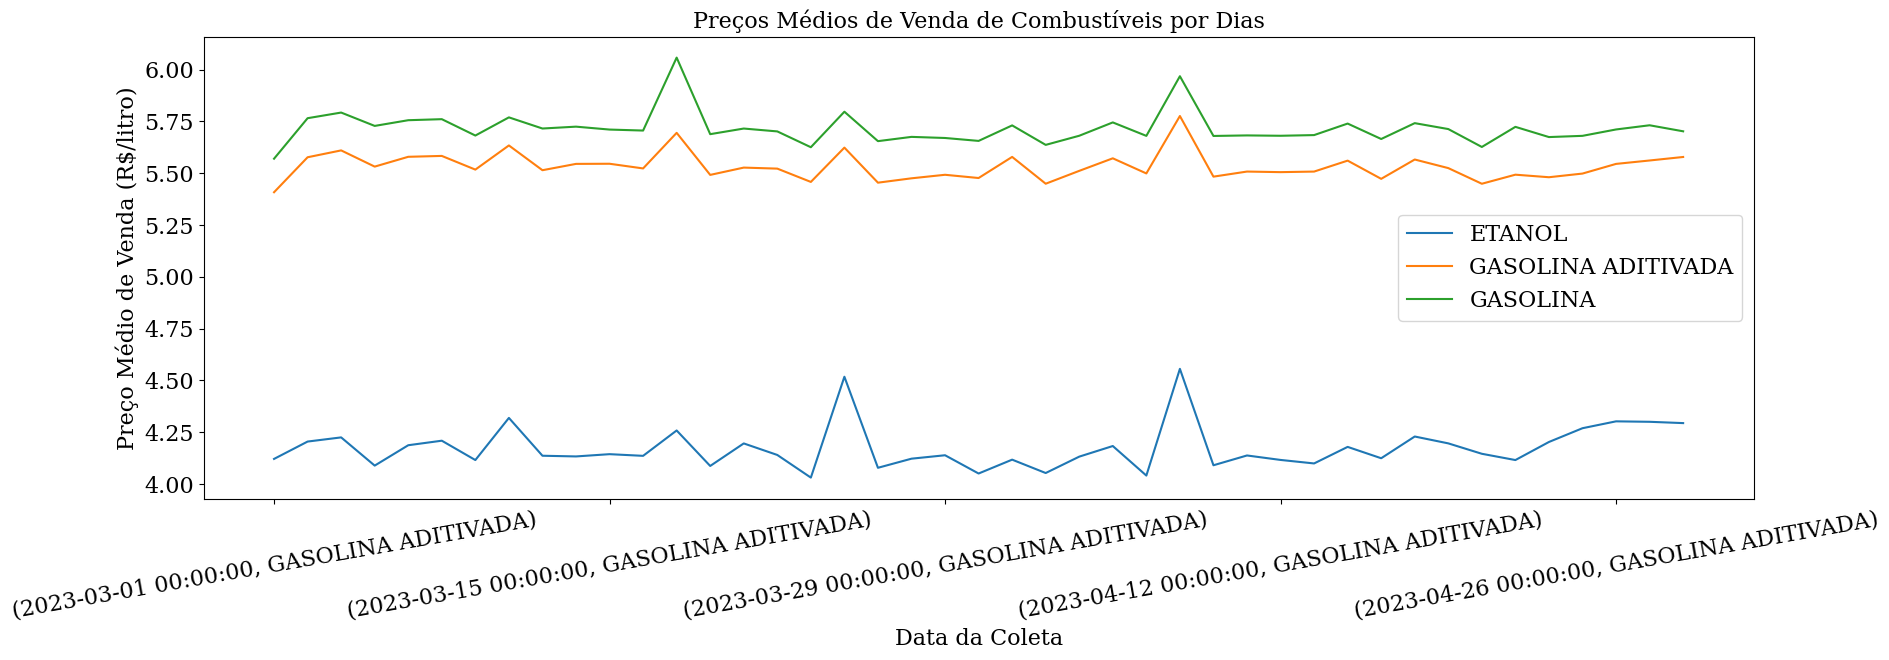

In [ ]:
#Gráfico de comportamento do preço dos combustiveis durante os meses analisados

#definindo a fonte desejada
fonte = {'family': 'serif',
         'weight': 'normal',
         'size': 16}

#configurações de fonte
plt.rcParams['font.family'] = fonte['family']
plt.rcParams['font.weight'] = fonte['weight']
plt.rcParams['font.size'] = fonte['size']

fig, ax = plt.subplots(figsize=(20, 6))

for produto, data in aggdias.groupby('Produto'):
    data.plot(ax=ax,label=copia['Produto'].unique())

ax.set_title('Preços Médios de Venda de Combustíveis por Dias', fontdict=fonte)
ax.set_xlabel('Data da Coleta', fontdict=fonte)
ax.set_ylabel('Preço Médio de Venda (R$/litro)', fontdict=fonte)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, copia['Produto'].unique(), fontsize=fonte['size']) #gera a legenda do gráfico
plt.xticks(rotation=10) 
plt.show() #plota o gráfico no terminal

### [ 2 ] Preço médio dos combustíveis durante março/2023 e abril/2023

In [ ]:
#Agrupamento dos dados por tipo de combustível pela função .groupby(), seguido de agregação via função .agg() em cima
#do preço desses combustíveis para extração da média via função .mean()
precomedio = copia.groupby('Produto').agg({'Valor de Venda': 'mean'})
display(precomedio.round(2))

,Valor de Venda
Produto,
ETANOL,4.15
GASOLINA,5.51
GASOLINA ADITIVADA,5.69


### [ 3 ] Os 5 estados com o preço médio de combustíveis mais caros

In [ ]:
#Agrupamento dos dados pela sigla de cada estado e pelo tipo de combustível pela função .groupby(),
#seguido de agregação via função .agg() em cima do preço desses combustíveis para extração da média via função .mean()
mediaCombustiveis = copia.groupby(['Estado - Sigla', 'Produto']).agg({'Valor de Venda': 'mean'})
display(mediaCombustiveis)

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                    4.433030
               GASOLINA                  5.926000
               GASOLINA ADITIVADA        5.973248
AL             ETANOL                    4.375649
               GASOLINA                  5.779836
...                                           ...
SP             GASOLINA                  5.339905
               GASOLINA ADITIVADA        5.586960
TO             ETANOL                    4.527049
               GASOLINA                  5.724865
               GASOLINA ADITIVADA        5.862028

[81 rows x 1 columns]

In [ ]:
#Filtro das informações da variável anterior via função .loc() para obter os dados selecionados e
#via funções .index.get_level_values para acessar os valores desses índices no nível hierárquico que queremos
#(no caso, o segundo nível: Produto)
mediaCombustiveis2 = mediaCombustiveis.loc[(mediaCombustiveis.index.get_level_values('Produto') == 'GASOLINA') |
                                         (mediaCombustiveis.index.get_level_values('Produto') == 'GASOLINA ADITIVADA') |
                                         (mediaCombustiveis.index.get_level_values('Produto') == 'ETANOL')]

In [ ]:
#Ordenação via função .sort_values() em ordem decrescente do preço médio dos combustíveis
mediaCombustiveis2 = mediaCombustiveis2.sort_values(['Produto', 'Valor de Venda'], ascending=[True, False])
display(mediaCombustiveis2)

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,5.224000
RO,ETANOL,4.913316
RS,ETANOL,4.910343
RR,ETANOL,4.905556
PA,ETANOL,4.781585
...,...,...
PE,GASOLINA ADITIVADA,5.565403
MG,GASOLINA ADITIVADA,5.547102
SE,GASOLINA ADITIVADA,5.484038


In [ ]:
#Criação de variáveis para as 5 primeiras linhas de cada combustível via função .head()
rank5GAS = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'GASOLINA'].head()
rank5GASAD = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'GASOLINA ADITIVADA'].head()
rank5ET = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'ETANOL'].head()

In [ ]:
#Exibição dos resultados
display("Top 5 estados com o preço médio mais alto de GASOLINA:", rank5GAS.round(2))
print(' ')
display("Top 5 estados com o preço médio mais alto de GASOLINA ADITIVADA:", rank5GASAD.round(2))
print(' ')
display("Top 5 estados com o preço médio mais alto de ETANOL:", rank5ET.round(2))


'Top 5 estados com o preço médio mais alto de GASOLINA:'

,,Valor de Venda
Estado - Sigla,Produto,
AM,GASOLINA,6.49
RR,GASOLINA,6.09
RO,GASOLINA,5.99
AC,GASOLINA,5.93
RN,GASOLINA,5.87


'Top 5 estados com o preço médio mais alto de GASOLINA ADITIVADA:'

,,Valor de Venda
Estado - Sigla,Produto,
AM,GASOLINA ADITIVADA,6.52
RR,GASOLINA ADITIVADA,6.16
RO,GASOLINA ADITIVADA,6.08
CE,GASOLINA ADITIVADA,5.99
AC,GASOLINA ADITIVADA,5.97


'Top 5 estados com o preço médio mais alto de ETANOL:'

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,5.22
RO,ETANOL,4.91
RS,ETANOL,4.91
RR,ETANOL,4.91
PA,ETANOL,4.78


### [ 4 ] Preço médio dos combustíveis por estado

In [106]:
#Agrupamento dos dados numa variável por sigla do estado e tipo de combustível pela função .groupby(),
#seguido de agregação via função .agg() em cima do preço desses combustíveis para extração da média via função .mean()
mediaCombustiveis3 = copia.groupby(['Estado - Sigla', 'Produto']).agg({'Valor de Venda': 'mean'}).round(2)
display(mediaCombustiveis3)

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                        4.43
               GASOLINA                      5.93
               GASOLINA ADITIVADA            5.97
AL             ETANOL                        4.38
               GASOLINA                      5.78
...                                           ...
SP             GASOLINA                      5.34
               GASOLINA ADITIVADA            5.59
TO             ETANOL                        4.53
               GASOLINA                      5.72
               GASOLINA ADITIVADA            5.86

[81 rows x 1 columns]

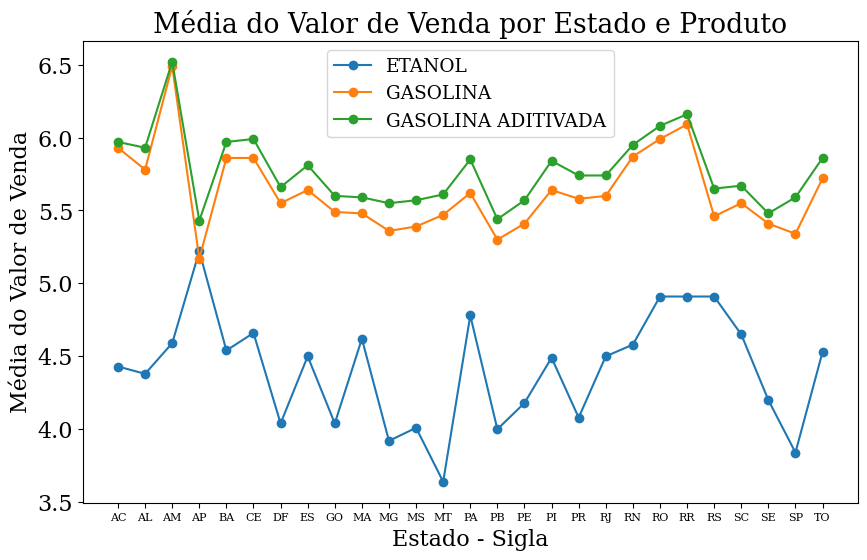

In [107]:
#resetando o índice do DataFrame para facilitar a plotagem das linhas
mediaCombustiveis3.reset_index(inplace=True)

#plot de linhas
plt.figure(figsize=(10, 6))
for produto in mediaCombustiveis3['Produto'].unique():
    df_produto = mediaCombustiveis3[mediaCombustiveis3['Produto'] == produto]
    plt.plot(df_produto['Estado - Sigla'], df_produto['Valor de Venda'], marker='o', label=produto)

#configurando as legendas do gráfico
plt.title('Média do Valor de Venda por Estado e Produto')
plt.xlabel('Estado - Sigla')
plt.ylabel('Média do Valor de Venda')
plt.legend(fontsize='small')

#ajustando o tamanho da fonte das siglas dos estados no eixo x
plt.xticks(fontsize=8)

#visualização do gráfico
plt.show()

### [ 5 ] Município que possui o menor preço para cada combustível

In [116]:
#GASOLINA ADITIVADA
gasAD = copia.loc[copia['Produto'] == 'GASOLINA ADITIVADA', 'Valor de Venda'].idxmin() #buscando o valor mínimo via .loc() com .idxmin()
minimo = copia.loc[gasAD, 'Municipio'] #recuperando município e estado correspondentes ao índice que foi puxado
minimoE = copia.loc[gasAD, 'Estado - Sigla']
valorMinimogasAD = copia.loc[gasAD, 'Valor de Venda']
display(minimo, minimoE, valorMinimogasAD)
#o mesmo raciocínio de código foi aplicado para buscar as informações pros demais combustíveis

1431          ITU
1431    SAO PAULO
Name: Municipio, dtype: object

1431    SP
1431    SP
Name: Estado - Sigla, dtype: object

1431    4.52
1431    4.97
Name: Valor de Venda, dtype: float64

In [117]:
#GASOLINA 
gasNorm = copia.loc[copia['Produto'] == 'GASOLINA', 'Valor de Venda'].idxmin()
minimo2 = copia.loc[gasNorm, 'Municipio']
minimo2E = copia.loc[gasNorm, 'Estado - Sigla']
valorMinimogasNorm = copia.loc[gasNorm, 'Valor de Venda']
display(minimo2, minimo2E, valorMinimogasNorm)

918          SAO PAULO
918    MOGI DAS CRUZES
Name: Municipio, dtype: object

918    SP
918    SP
Name: Estado - Sigla, dtype: object

918    4.23
918    5.19
Name: Valor de Venda, dtype: float64

In [118]:
#ETANOL
etanol = copia.loc[copia['Produto'] == 'ETANOL', 'Valor de Venda'].idxmin()
minimo3 = copia.loc[etanol, 'Municipio']
minimo3E = copia.loc[etanol, 'Estado - Sigla']
valorMinimoEt = copia.loc[etanol, 'Valor de Venda']
display(minimo3, minimo3E, valorMinimoEt)

1091    VARZEA GRANDE
1091        SAO PAULO
Name: Municipio, dtype: object

1091    MT
1091    SP
Name: Estado - Sigla, dtype: object

1091    3.13
1091    6.19
Name: Valor de Venda, dtype: float64

### [ 6 ] Município que possui o maior preço para cada combustível

In [119]:
#GASOLINA ADITIVADA
gasAD2 = copia.loc[copia['Produto'] == 'GASOLINA ADITIVADA', 'Valor de Venda'].idxmax() #buscando o valor máximo via .loc() com .idxmax()
maximo = copia.loc[gasAD2, 'Municipio'] #recuperando município e estado correspondentes ao índice máximo
maximoE = copia.loc[gasAD2, 'Estado - Sigla']
valorMaximoAD = copia.loc[gasAD2, 'Valor de Venda']
display(maximo, maximoE, valorMaximoAD)
#mesmo raciocínio de código aplicado para buscar as informações de valor máximo pros demais combustíveis

15586         ARIQUEMES
15586    JARAGUA DO SUL
Name: Municipio, dtype: object

15586    RO
15586    SC
Name: Estado - Sigla, dtype: object

15586    8.97
15586    5.98
Name: Valor de Venda, dtype: float64

In [120]:
#GASOLINA 
gasNorm2 = copia.loc[copia['Produto'] == 'GASOLINA', 'Valor de Venda'].idxmax()
maximo2 = copia.loc[gasNorm2, 'Municipio']
maximo2E = copia.loc[gasNorm2, 'Estado - Sigla']
valorMaximoNorm = copia.loc[gasNorm2, 'Valor de Venda']
display(maximo2, maximo2E, valorMaximoNorm)

34529    ITAQUAQUECETUBA
34529               TEFE
Name: Municipio, dtype: object

34529    SP
34529    AM
Name: Estado - Sigla, dtype: object

34529    5.29
34529    7.35
Name: Valor de Venda, dtype: float64

In [121]:
#ETANOL
etanol2 = copia.loc[copia['Produto'] == 'ETANOL', 'Valor de Venda'].idxmax()
maximo3 = copia.loc[etanol2, 'Municipio']
maximo3E = copia.loc[etanol2, 'Estado - Sigla']
valorMaximoEt = copia.loc[etanol2, 'Valor de Venda']
display(maximo3, maximo3E, valorMaximoEt)

4826     ATIBAIA
4826    PAULINIA
Name: Municipio, dtype: object

4826    SP
4826    SP
Name: Estado - Sigla, dtype: object

4826    3.97
4826    6.59
Name: Valor de Venda, dtype: float64

### [ 7 ] Região que possui o maior valor médio da gasolina

In [130]:
#armazenando em variável o filtro via .loc() pelo combustível e agrupando via .groupby() a região e média de valor requeridos
regmaxG = copia.loc[copia['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()
display(regmaxG.idxmax(),regmaxG.max().round(2))

'N'

5.86

### [ 8 ] Região que possui o menor valor médio do etanol

In [131]:
#armazenando em variável o filtro via .loc() pelo combustível e agrupando via .groupby() a região e média de valor requeridos
regminEt = copia.loc[copia['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean()
display(regminEt.idxmin(),regminEt.min().round(2))

'CO'

3.97

### [ 9 ] Correlação entre o valor dos combustíveis e as regiões onde eles são vendidos


In [133]:
#criando uma cópia do database utilizado para os insights somente para análise das correlações
copia2=copia.copy()
copia2

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,ETANOL,2023-03-01,4.29,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,GASOLINA ADITIVADA,2023-03-01,5.39,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,GASOLINA,2023-03-01,5.39,VIBRA ENERGIA
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,GASOLINA ADITIVADA,2023-03-01,5.35,VIBRA ENERGIA
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,GASOLINA,2023-03-01,5.29,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
46415,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,GASOLINA ADITIVADA,2023-04-28,5.39,BRANCA
46416,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,GASOLINA,2023-04-28,5.39,BRANCA
46417,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,ETANOL,2023-04-28,4.09,VIBRA ENERGIA
46418,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,GASOLINA ADITIVADA,2023-04-28,5.89,VIBRA ENERGIA


In [134]:
#ETANOL
#armazenando uma série de cada região por variável via .loc() composto
etanolN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda']
etanolNE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda']
etanolCO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda']
etanolSE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda']
etanolS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda']

In [135]:
#montando novos dataframe em cima das 5 séries anteriores
feN = pd.DataFrame({'Norte': etanolN})
feNE = pd.DataFrame({'Nordeste':etanolNE})
feCO = pd.DataFrame({'Centro Oeste':etanolCO})
feSE = pd.DataFrame({'Sudeste':etanolSE})
feS = pd.DataFrame({'Sul':etanolS})

In [136]:
#concatenando os dataframes anteriores via .concat()
etanolPerRegiao = pd.concat([feN, feNE, feCO, feSE, feS])

In [138]:
#criando a matriz de correlação via .corr(), considerando os campos nulos como zeo via .fillna(0)
corrEtanol=etanolPerRegiao.fillna(0).corr()
display(corrEtanol)

,Norte,Nordeste,Centro Oeste,Sudeste,Sul
Norte,1.000000,-0.096165,-0.060500,-0.216321,-0.076238
Nordeste,-0.096165,1.000000,-0.149773,-0.535517,-0.188732
Centro Oeste,-0.060500,-0.149773,1.000000,-0.336912,-0.118737
Sudeste,-0.216321,-0.535517,-0.336912,1.000000,-0.424548
Sul,-0.076238,-0.188732,-0.118737,-0.424548,1.000000


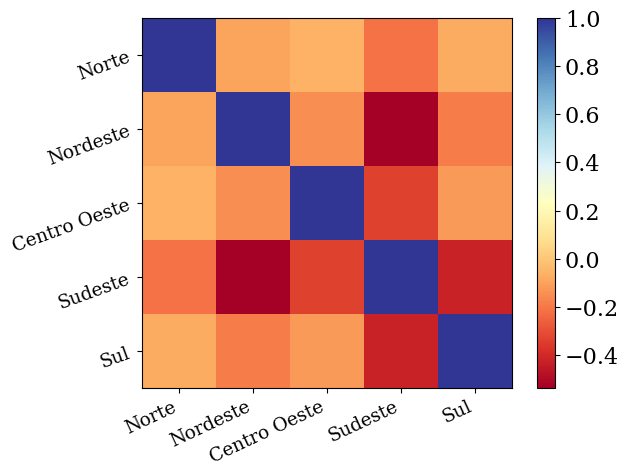

In [145]:
#criando o gráfico de calor a partir da matriz de correlação anterior 'corrEtanol'
fig, ax = plt.subplots()
heatmap = ax.imshow(corrEtanol, cmap='RdYlBu')
#ajustando os eixos
ax.set_xticks(np.arange(corrEtanol.shape[1]))
ax.set_yticks(np.arange(corrEtanol.shape[0]))
ax.set_xticklabels(corrEtanol.columns)
ax.set_yticklabels(corrEtanol.columns)
plt.yticks(rotation=20, fontsize='small', ha='right')
plt.xticks(rotation=25, fontsize='small', ha='right')
#adicionando barra de cores
cbar = plt.colorbar(heatmap)
#visualizando o gráfico
plt.show()

In [146]:
#GASOLINA
#armazenando uma série de cada região por variável via .loc() composto
gasolinaN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda']
gasolinaNE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda']
gasolinaCO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda']
gasolinaSE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda']
gasolinaS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda']

In [156]:
#montando novos dataframe em cima das 5 séries anteriores
fgN = pd.DataFrame({'Norte': gasolinaN})
fgNE = pd.DataFrame({'Nordeste':gasolinaNE})
fgCO = pd.DataFrame({'Centro Oeste':gasolinaCO})
fgSE = pd.DataFrame({'Sudeste':gasolinaSE})
fgS = pd.DataFrame({'Sul':gasolinaS})

In [157]:
#concatenando os dataframes anteriores via .concat()
gasolinaPorRegiao = pd.concat([fgN, fgNE, fgCO, fgSE, fgS])

In [158]:
#criando a matriz de correlação via .corr(), considerando os campos nulos como zeo via .fillna(0)
corrGasolina=gasolinaPorRegiao.fillna(0).corr()
display(corrGasolina)

,Norte,Nordeste,Centro Oeste,Sudeste,Sul
Norte,1.000000,-0.133619,-0.080309,-0.271205,-0.128360
Nordeste,-0.133619,1.000000,-0.138014,-0.466073,-0.220591
Centro Oeste,-0.080309,-0.138014,1.000000,-0.280125,-0.132582
Sudeste,-0.271205,-0.466073,-0.280125,1.000000,-0.447729
Sul,-0.128360,-0.220591,-0.132582,-0.447729,1.000000


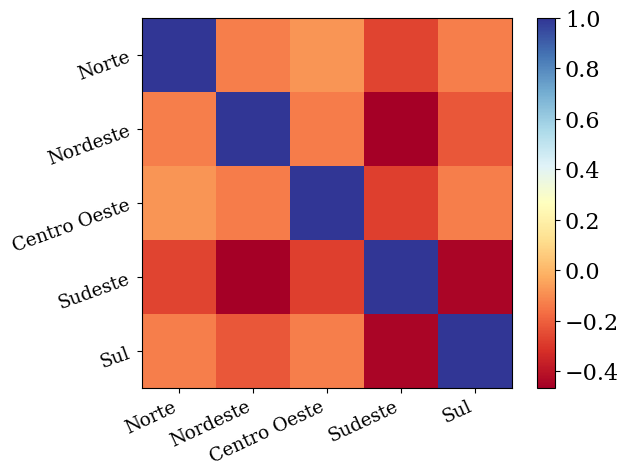

In [159]:
#criando o gráfico de calor a partir da matriz de correlação anterior 'corrGasolina'
fig, ax = plt.subplots()
heatmap = ax.imshow(corrGasolina, cmap='RdYlBu')
#ajustando os eixos
ax.set_xticks(np.arange(corrGasolina.shape[1]))
ax.set_yticks(np.arange(corrGasolina.shape[0]))
ax.set_xticklabels(corrGasolina.columns)
ax.set_yticklabels(corrGasolina.columns)
plt.yticks(rotation=20, fontsize='small', ha='right')
plt.xticks(rotation=25, fontsize='small', ha='right')
#adicionando barra de cores
cbar = plt.colorbar(heatmap)
#visualizando o gráfico
plt.show()

In [151]:
#GASOLINA ADITIVADA
#armazenando uma série de cada região por variável via .loc() composto
gasolinaAN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda']
gasolinaANE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda']
gasolinaACO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda']
gasolinaASE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda']
gasolinaAS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda']

In [160]:
#montando novos dataframe em cima das 5 séries anteriores
fgaN = pd.DataFrame({'Norte': gasolinaAN})
fgaNE = pd.DataFrame({'Nordeste':gasolinaANE})
fgaCO = pd.DataFrame({'Centro Oeste':gasolinaACO})
fgaSE = pd.DataFrame({'Sudeste':gasolinaASE})
fgaS = pd.DataFrame({'Sul':gasolinaAS})

In [161]:
#concatenando os dataframes anteriores via .concat()
gasolinaA_PorRegiao = pd.concat([fgN, fgNE, fgCO, fgSE, fgS])

In [162]:
#criando a matriz de correlação via .corr(), considerando os campos nulos como zeo via .fillna(0)
corrGasolinaAD=gasolinaA_PorRegiao.fillna(0).corr()
display(corrGasolinaAD)

,Norte,Nordeste,Centro Oeste,Sudeste,Sul
Norte,1.000000,-0.133619,-0.080309,-0.271205,-0.128360
Nordeste,-0.133619,1.000000,-0.138014,-0.466073,-0.220591
Centro Oeste,-0.080309,-0.138014,1.000000,-0.280125,-0.132582
Sudeste,-0.271205,-0.466073,-0.280125,1.000000,-0.447729
Sul,-0.128360,-0.220591,-0.132582,-0.447729,1.000000


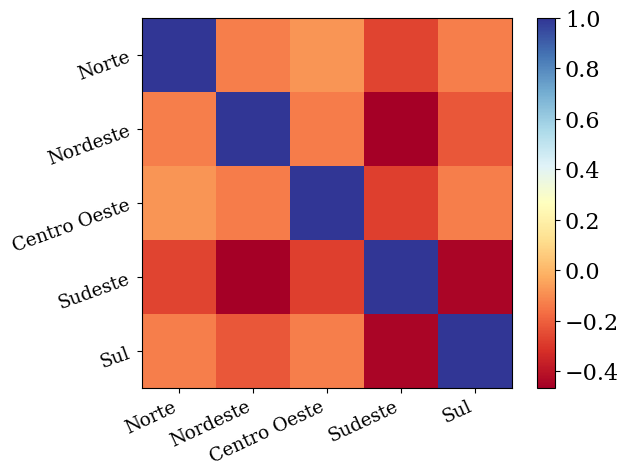

In [163]:
#criando o gráfico de calor a partir da matriz de correlação anterior 'corrGasolinaAD'
fig, ax = plt.subplots()
heatmap = ax.imshow(corrGasolina, cmap='RdYlBu')
#ajustando os eixos
ax.set_xticks(np.arange(corrGasolinaAD.shape[1]))
ax.set_yticks(np.arange(corrGasolinaAD.shape[0]))
ax.set_xticklabels(corrGasolinaAD.columns)
ax.set_yticklabels(corrGasolinaAD.columns)
plt.yticks(rotation=20, fontsize='small', ha='right')
plt.xticks(rotation=25, fontsize='small', ha='right')
#adicionando barra de cores
cbar = plt.colorbar(heatmap)
#visualizando o gráfico
plt.show()

### [ 10 ] Correlação entre o valor dos combustíveis e as bandeiras que os vendem

In [ ]:
#verificação quantitativa de bandeiras espalhadas pelo país no bimestre analisado
copia2['Bandeira'].drop_duplicates() #total de 46 bandeiras

0               VIBRA ENERGIA
5                       SABBÁ
11                   IPIRANGA
25                     BRANCA
35                     RAIZEN
124                    ALESAT
346                    TAURUS
357                 SIMARELLI
465       SETTA DISTRIBUIDORA
467                    DISLUB
473         TDC DISTRIBUIDORA
518                   ESTRADA
567                     IDAZA
674                    RODOIL
680                   CHARRUA
696               RAIZEN MIME
703                   REJAILE
714                     STANG
1199            TOTALENERGIES
1224                  ATEM' S
1282                   MAXSUL
1425              PETROBRASIL
1595      MASUT DISTRIBUIDORA
1626                  EQUADOR
1808               PETROBAHIA
1842                       SP
1966               RIO BRANCO
2050                    LARCO
2132                POTENCIAL
2910                   TEMAPE
3146                  DIBRAPE
3493                ATLÂNTICA
3721                ROYAL FIC
3810      

Como a quantidade de bandeiras é muito maior para correlações do que o que trabalhamos no questionamento anterior, dividimos as correlações por combustível e, também, para cada região. Isso vai de encontro à análise, pois há bandeiras de incidência regional, ocasionando em *outliers* desnecessários.

In [164]:
#REGIÃO NORTE
#ETANOL: P(preço) e N(região)
etanolPN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda'].values
etanolBandeira = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'ETANOL'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':etanolPN, 'Bandeira': etanolBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,EQUADOR,IPIRANGA,RAIZEN,SABBÁ,SIMARELLI,VIBRA ENERGIA
Bandeira,,,,,,,,,
ALESAT,1.000000,-0.043704,-0.080972,-0.019575,-0.071951,-0.025543,-0.040705,-0.010991,-0.093740
ATEM' S,-0.043704,1.000000,-0.176403,-0.042646,-0.156750,-0.055648,-0.088680,-0.023945,-0.204220
BRANCA,-0.080972,-0.176403,1.000000,-0.079012,-0.290415,-0.103100,-0.164299,-0.044363,-0.378365
EQUADOR,-0.019575,-0.042646,-0.079012,1.000000,-0.070209,-0.024925,-0.039720,-0.010725,-0.091471
IPIRANGA,-0.071951,-0.156750,-0.290415,-0.070209,1.000000,-0.091613,-0.145995,-0.039420,-0.336211
RAIZEN,-0.025543,-0.055648,-0.103100,-0.024925,-0.091613,1.000000,-0.051829,-0.013995,-0.119358
SABBÁ,-0.040705,-0.088680,-0.164299,-0.039720,-0.145995,-0.051829,1.000000,-0.022302,-0.190208
SIMARELLI,-0.010991,-0.023945,-0.044363,-0.010725,-0.039420,-0.013995,-0.022302,1.000000,-0.051358
VIBRA ENERGIA,-0.093740,-0.204220,-0.378365,-0.091471,-0.336211,-0.119358,-0.190208,-0.051358,1.000000


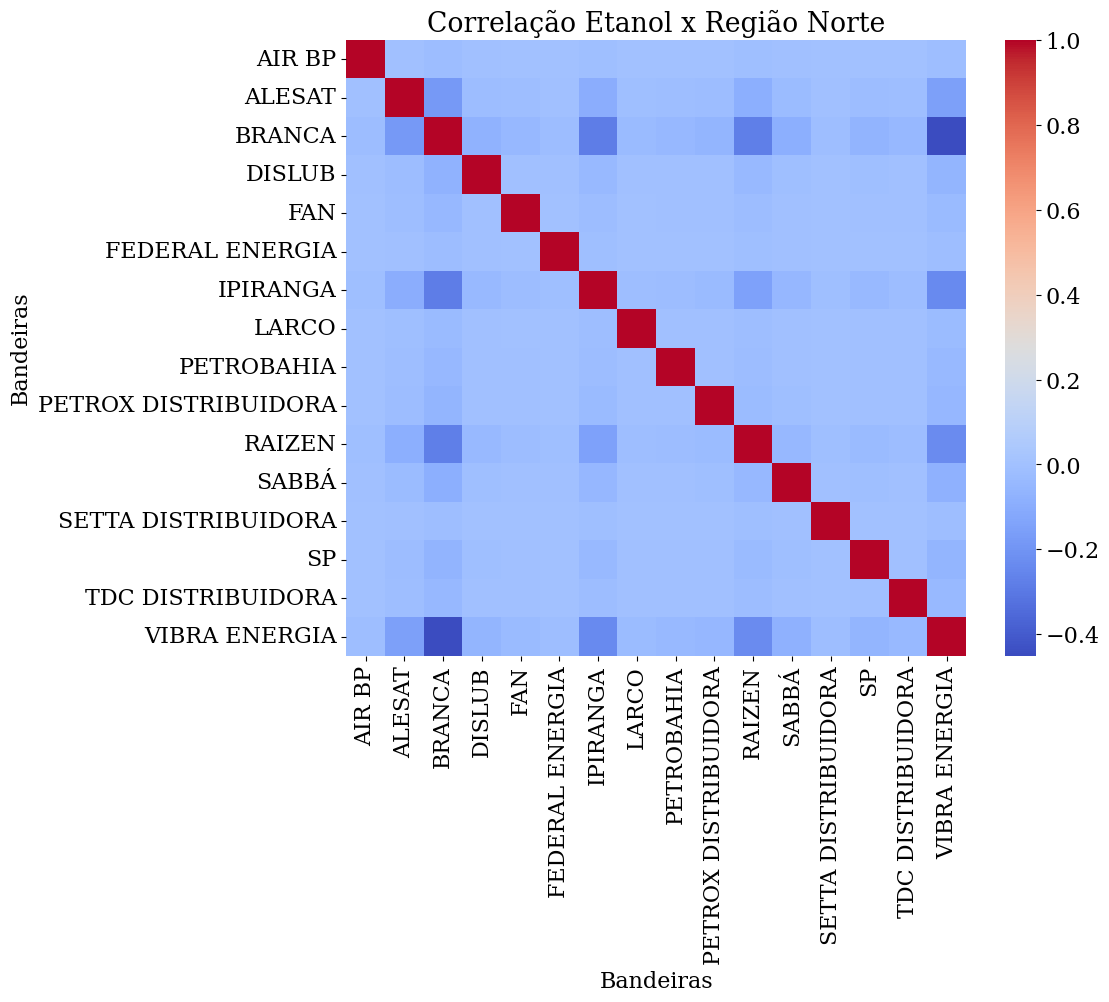

In [169]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlação Etanol x Região Norte')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [171]:
#REGIÃO NORDESTE
#ETANOL: P(preço) e NE(região)
etanolPNE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda'].values
etanolBandeira = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'ETANOL'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':etanolPNE, 'Bandeira': etanolBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007064,-0.021084,-0.003024,-0.001708,-0.000832,-0.011202,-0.001440,-0.001744,-0.002360,-0.010911,-0.003629,-0.000744,-0.002794,-0.001748,-0.017788
ALESAT,-0.007064,1.000000,-0.178966,-0.025671,-0.014495,-0.007063,-0.095089,-0.012226,-0.014804,-0.020035,-0.092618,-0.030803,-0.006317,-0.023719,-0.014837,-0.150988
BRANCA,-0.021084,-0.178966,1.000000,-0.076624,-0.043266,-0.021081,-0.283827,-0.036492,-0.044189,-0.059802,-0.276451,-0.091943,-0.018855,-0.070796,-0.044286,-0.450678
DISLUB,-0.003024,-0.025671,-0.076624,1.000000,-0.006206,-0.003024,-0.040712,-0.005234,-0.006338,-0.008578,-0.039654,-0.013188,-0.002705,-0.010155,-0.006352,-0.064645
FAN,-0.001708,-0.014495,-0.043266,-0.006206,1.000000,-0.001707,-0.022988,-0.002956,-0.003579,-0.004844,-0.022391,-0.007447,-0.001527,-0.005734,-0.003587,-0.036502
FEDERAL ENERGIA,-0.000832,-0.007063,-0.021081,-0.003024,-0.001707,1.000000,-0.011201,-0.001440,-0.001744,-0.002360,-0.010910,-0.003628,-0.000744,-0.002794,-0.001748,-0.017785
IPIRANGA,-0.011202,-0.095089,-0.283827,-0.040712,-0.022988,-0.011201,1.000000,-0.019389,-0.023479,-0.031774,-0.146885,-0.048851,-0.010018,-0.037616,-0.023530,-0.239456
LARCO,-0.001440,-0.012226,-0.036492,-0.005234,-0.002956,-0.001440,-0.019389,1.000000,-0.003019,-0.004085,-0.018885,-0.006281,-0.001288,-0.004836,-0.003025,-0.030787
PETROBAHIA,-0.001744,-0.014804,-0.044189,-0.006338,-0.003579,-0.001744,-0.023479,-0.003019,1.000000,-0.004947,-0.022868,-0.007606,-0.001560,-0.005856,-0.003663,-0.037281


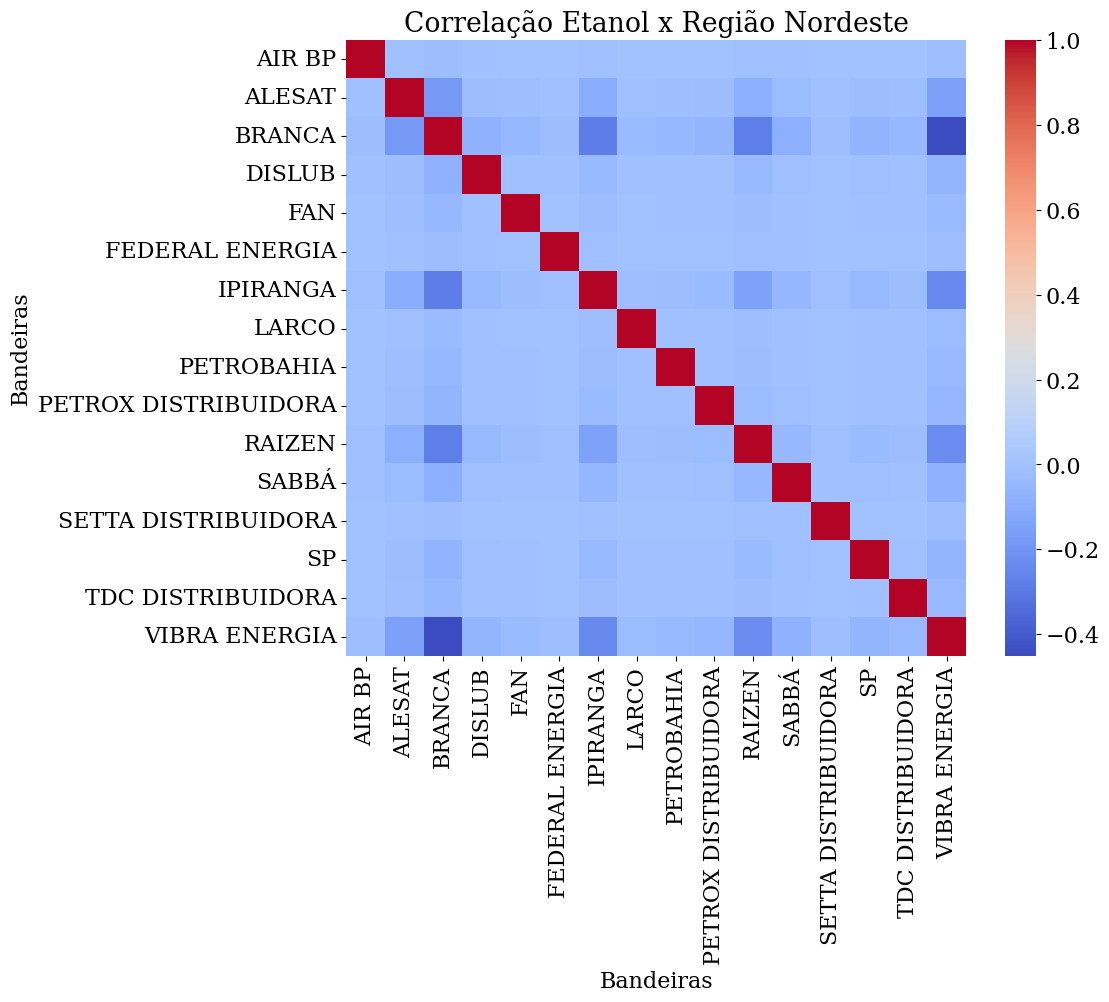

In [173]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlação Etanol x Região Nordeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [175]:
#REGIÃO CENTRO-OESTE
#ETANOL: P(preço) e CO(região)
etanolPCO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda'].values
etanolBandeira = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'ETANOL'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':etanolPCO, 'Bandeira': etanolBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,ROYAL FIC,SIMARELLI,TAURUS,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.003672,-0.111951,-0.006873,-0.076646,-0.013548,-0.048897,-0.008215,-0.005809,-0.005809,-0.023656,-0.002596,-0.057968
ATEM' S,-0.003672,1.000000,-0.022692,-0.001393,-0.015536,-0.002746,-0.009911,-0.001665,-0.001177,-0.001177,-0.004795,-0.000526,-0.011750
BRANCA,-0.111951,-0.022692,1.000000,-0.042476,-0.473658,-0.083725,-0.302176,-0.050768,-0.035898,-0.035899,-0.146189,-0.016043,-0.358233
CIAPETRO,-0.006873,-0.001393,-0.042476,1.000000,-0.029081,-0.005140,-0.018553,-0.003117,-0.002204,-0.002204,-0.008976,-0.000985,-0.021994
IPIRANGA,-0.076646,-0.015536,-0.473658,-0.029081,1.000000,-0.057322,-0.206882,-0.034758,-0.024577,-0.024578,-0.100087,-0.010984,-0.245262
MASUT DISTRIBUIDORA,-0.013548,-0.002746,-0.083725,-0.005140,-0.057322,1.000000,-0.036569,-0.006144,-0.004344,-0.004344,-0.017692,-0.001942,-0.043353
RAIZEN,-0.048897,-0.009911,-0.302176,-0.018553,-0.206882,-0.036569,1.000000,-0.022174,-0.015679,-0.015680,-0.063852,-0.007007,-0.156468
RIO BRANCO,-0.008215,-0.001665,-0.050768,-0.003117,-0.034758,-0.006144,-0.022174,1.000000,-0.002634,-0.002634,-0.010728,-0.001177,-0.026288
ROYAL FIC,-0.005809,-0.001177,-0.035898,-0.002204,-0.024577,-0.004344,-0.015679,-0.002634,1.000000,-0.001863,-0.007585,-0.000832,-0.018588


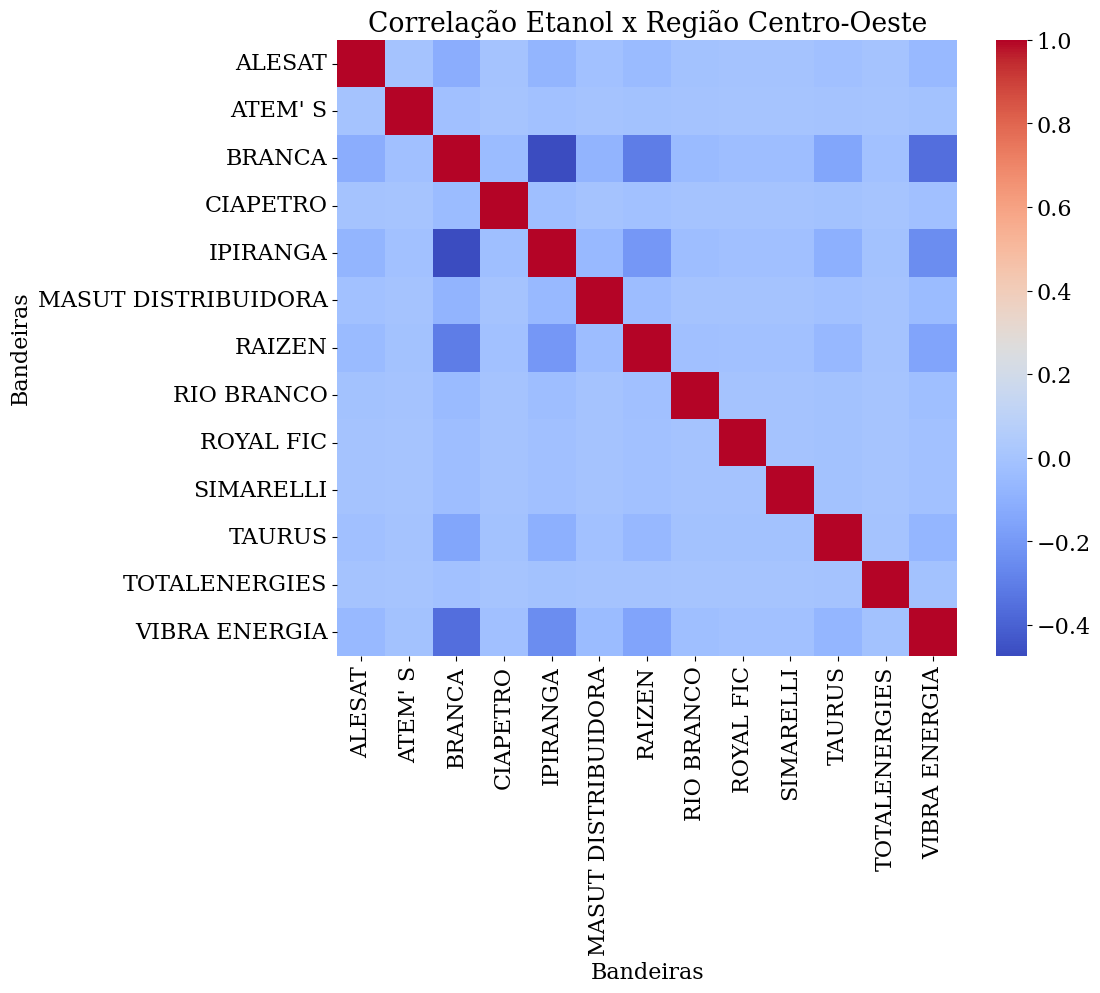

In [178]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlação Etanol x Região Centro-Oeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [179]:
#REGIÃO SUDESTE
#ETANOL: P(preço) e SE(região)
etanolPSE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda'].values
etanolBandeira = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'ETANOL'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':etanolPSE, 'Bandeira': etanolBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TAURUS,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.009411,-0.160505,-0.005182,-0.006555,-0.115601,-0.004632,-0.095611,-0.006130,-0.002839,-0.001639,-0.012471,-0.103891
ATLÂNTICA,-0.009411,1.000000,-0.032837,-0.001060,-0.001341,-0.023650,-0.000948,-0.019561,-0.001254,-0.000581,-0.000335,-0.002551,-0.021255
BRANCA,-0.160505,-0.032837,1.000000,-0.018081,-0.022872,-0.403354,-0.016162,-0.333607,-0.021388,-0.009905,-0.005718,-0.043514,-0.362497
CIAPETRO,-0.005182,-0.001060,-0.018081,1.000000,-0.000738,-0.013022,-0.000522,-0.010770,-0.000691,-0.000320,-0.000185,-0.001405,-0.011703
D`MAIS,-0.006555,-0.001341,-0.022872,-0.000738,1.000000,-0.016473,-0.000660,-0.013625,-0.000874,-0.000405,-0.000234,-0.001777,-0.014804
IPIRANGA,-0.115601,-0.023650,-0.403354,-0.013022,-0.016473,1.000000,-0.011641,-0.240275,-0.015405,-0.007134,-0.004118,-0.031340,-0.261082
PETROBRASIL,-0.004632,-0.000948,-0.016162,-0.000522,-0.000660,-0.011641,1.000000,-0.009628,-0.000617,-0.000286,-0.000165,-0.001256,-0.010461
RAIZEN,-0.095611,-0.019561,-0.333607,-0.010770,-0.013625,-0.240275,-0.009628,1.000000,-0.012741,-0.005900,-0.003406,-0.025921,-0.215936
RIO BRANCO,-0.006130,-0.001254,-0.021388,-0.000691,-0.000874,-0.015405,-0.000617,-0.012741,1.000000,-0.000378,-0.000218,-0.001662,-0.013844


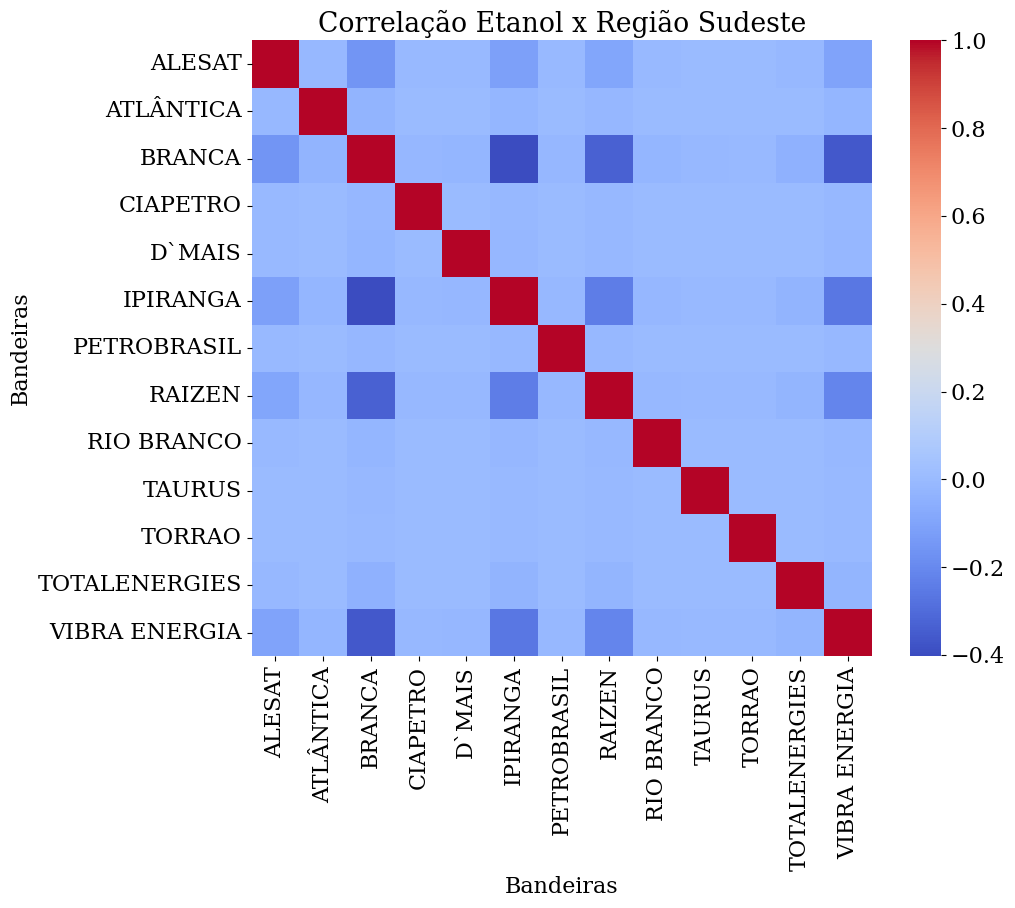

In [180]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlação Etanol x Região Sudeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [181]:
#REGIÃO SUL
#ETANOL: P(preço) e S(região)
etanolPS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'ETANOL'), 'Valor de Venda'].values
etanolBandeira = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'ETANOL'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':etanolPS, 'Bandeira': etanolBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,PELIKANO,POTENCIAL,RAIZEN,RAIZEN MIME,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.002074,-0.088451,-0.013503,-0.010998,-0.002074,-0.003593,-0.008251,-0.081566,-0.007764,...,-0.006566,-0.012318,-0.053928,-0.021814,-0.013664,-0.020387,-0.003592,-0.005852,-0.055542,-0.002074
AMERICANOIL,-0.002074,1.000000,-0.010425,-0.001592,-0.001296,-0.000244,-0.000423,-0.000973,-0.009614,-0.000915,...,-0.000774,-0.001452,-0.006356,-0.002571,-0.001611,-0.002403,-0.000423,-0.000690,-0.006546,-0.000244
BRANCA,-0.088451,-0.010425,1.000000,-0.067877,-0.055285,-0.010425,-0.018061,-0.041477,-0.410004,-0.039027,...,-0.033003,-0.061916,-0.271074,-0.109653,-0.068686,-0.102476,-0.018057,-0.029414,-0.279191,-0.010425
CHARRUA,-0.013503,-0.001592,-0.067877,1.000000,-0.008440,-0.001592,-0.002757,-0.006332,-0.062594,-0.005958,...,-0.005038,-0.009452,-0.041384,-0.016740,-0.010486,-0.015645,-0.002757,-0.004491,-0.042623,-0.001592
CIAPETRO,-0.010998,-0.001296,-0.055285,-0.008440,1.000000,-0.001296,-0.002246,-0.005157,-0.050982,-0.004853,...,-0.004104,-0.007699,-0.033707,-0.013635,-0.008541,-0.012742,-0.002245,-0.003658,-0.034716,-0.001296
DIBRAPE,-0.002074,-0.000244,-0.010425,-0.001592,-0.001296,1.000000,-0.000423,-0.000973,-0.009614,-0.000915,...,-0.000774,-0.001452,-0.006356,-0.002571,-0.001611,-0.002403,-0.000423,-0.000690,-0.006546,-0.000244
ESTRADA,-0.003593,-0.000423,-0.018061,-0.002757,-0.002246,-0.000423,1.000000,-0.001685,-0.016655,-0.001585,...,-0.001341,-0.002515,-0.011011,-0.004454,-0.002790,-0.004163,-0.000734,-0.001195,-0.011341,-0.000423
IDAZA,-0.008251,-0.000973,-0.041477,-0.006332,-0.005157,-0.000973,-0.001685,1.000000,-0.038248,-0.003641,...,-0.003079,-0.005776,-0.025288,-0.010229,-0.006408,-0.009560,-0.001685,-0.002744,-0.026045,-0.000973
IPIRANGA,-0.081566,-0.009614,-0.410004,-0.062594,-0.050982,-0.009614,-0.016655,-0.038248,1.000000,-0.035989,...,-0.030434,-0.057097,-0.249976,-0.101118,-0.063340,-0.094500,-0.016652,-0.027125,-0.257461,-0.009614


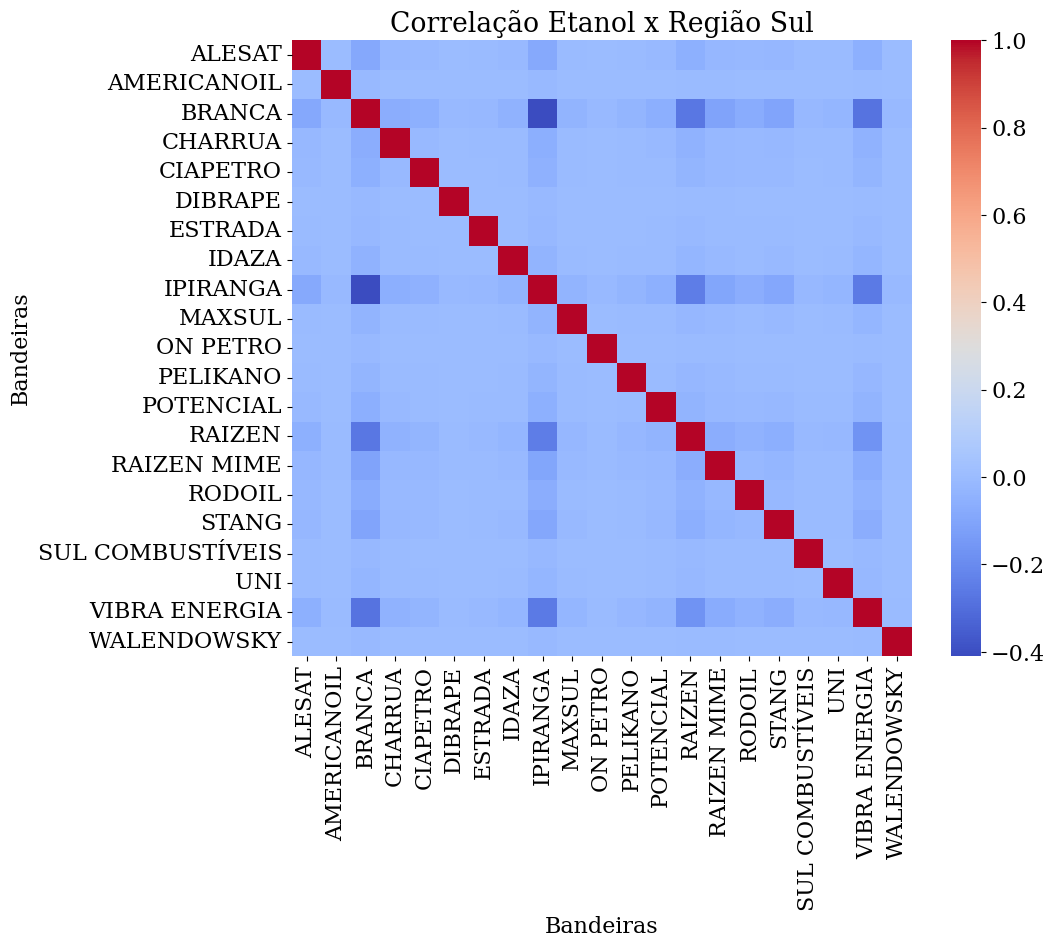

In [182]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlação Etanol x Região Sul')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [183]:
#REGIÃO NORTE
#GASOLINA: P(preço) e N(região)
gasolinaPN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda'].values
gasolinaBandeira = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gasolinaPN, 'Bandeira': gasolinaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,EQUADOR,IPIRANGA,RAIZEN,SABBÁ,VIBRA ENERGIA
Bandeira,,,,,,,,
ALESAT,1.000000,-0.031756,-0.084580,-0.021635,-0.073803,-0.019378,-0.042227,-0.083797
ATEM' S,-0.031756,1.000000,-0.147320,-0.037683,-0.128548,-0.033751,-0.073551,-0.145957
BRANCA,-0.084580,-0.147320,1.000000,-0.100368,-0.342383,-0.089895,-0.195900,-0.388750
EQUADOR,-0.021635,-0.037683,-0.100368,1.000000,-0.087579,-0.022995,-0.050110,-0.099439
IPIRANGA,-0.073803,-0.128548,-0.342383,-0.087579,1.000000,-0.078441,-0.170938,-0.339214
RAIZEN,-0.019378,-0.033751,-0.089895,-0.022995,-0.078441,1.000000,-0.044881,-0.089063
SABBÁ,-0.042227,-0.073551,-0.195900,-0.050110,-0.170938,-0.044881,1.000000,-0.194087
VIBRA ENERGIA,-0.083797,-0.145957,-0.388750,-0.099439,-0.339214,-0.089063,-0.194087,1.000000


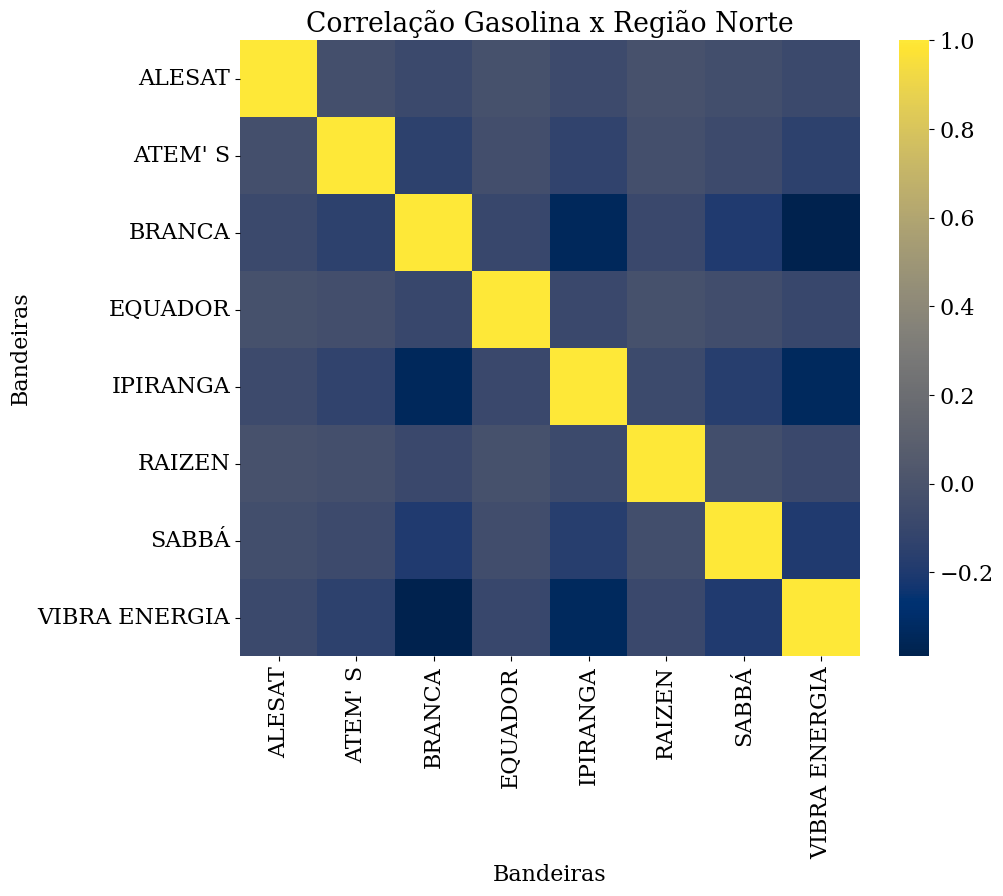

In [187]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cividis')
plt.title('Correlação Gasolina x Região Norte')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [188]:
#REGIÃO NORDESTE
#GASOLINA: P(preço) e NE(região)
gasolinaPNE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda'].values
gasolinaBandeira = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gasolinaPNE, 'Bandeira': gasolinaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,TEMAPE,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007205,-0.020342,-0.003040,-0.001514,-0.000739,-0.010297,-0.001280,-0.001549,-0.002095,-0.009869,-0.003858,-0.000661,-0.002854,-0.001551,-0.001280,-0.016315
ALESAT,-0.007205,1.000000,-0.198410,-0.029647,-0.014772,-0.007206,-0.100439,-0.012487,-0.015109,-0.020432,-0.096261,-0.037632,-0.006443,-0.027839,-0.015131,-0.012486,-0.159130
BRANCA,-0.020342,-0.198410,1.000000,-0.083704,-0.041705,-0.020345,-0.283572,-0.035254,-0.042656,-0.057686,-0.271776,-0.106247,-0.018192,-0.078597,-0.042720,-0.035252,-0.449275
DISLUB,-0.003040,-0.029647,-0.083704,1.000000,-0.006232,-0.003040,-0.042372,-0.005268,-0.006374,-0.008620,-0.040610,-0.015876,-0.002718,-0.011744,-0.006383,-0.005268,-0.067132
FAN,-0.001514,-0.014772,-0.041705,-0.006232,1.000000,-0.001515,-0.021112,-0.002625,-0.003176,-0.004295,-0.020234,-0.007910,-0.001354,-0.005852,-0.003181,-0.002625,-0.033448
FEDERAL ENERGIA,-0.000739,-0.007206,-0.020345,-0.003040,-0.001515,1.000000,-0.010299,-0.001280,-0.001549,-0.002095,-0.009870,-0.003859,-0.000661,-0.002855,-0.001552,-0.001280,-0.016317
IPIRANGA,-0.010297,-0.100439,-0.283572,-0.042372,-0.021112,-0.010299,1.000000,-0.017846,-0.021593,-0.029202,-0.137578,-0.053784,-0.009209,-0.039787,-0.021626,-0.017845,-0.227432
LARCO,-0.001280,-0.012487,-0.035254,-0.005268,-0.002625,-0.001280,-0.017846,1.000000,-0.002685,-0.003630,-0.017104,-0.006687,-0.001145,-0.004946,-0.002689,-0.002219,-0.028275
PETROBAHIA,-0.001549,-0.015109,-0.042656,-0.006374,-0.003176,-0.001549,-0.021593,-0.002685,1.000000,-0.004393,-0.020695,-0.008090,-0.001385,-0.005985,-0.003253,-0.002684,-0.034211


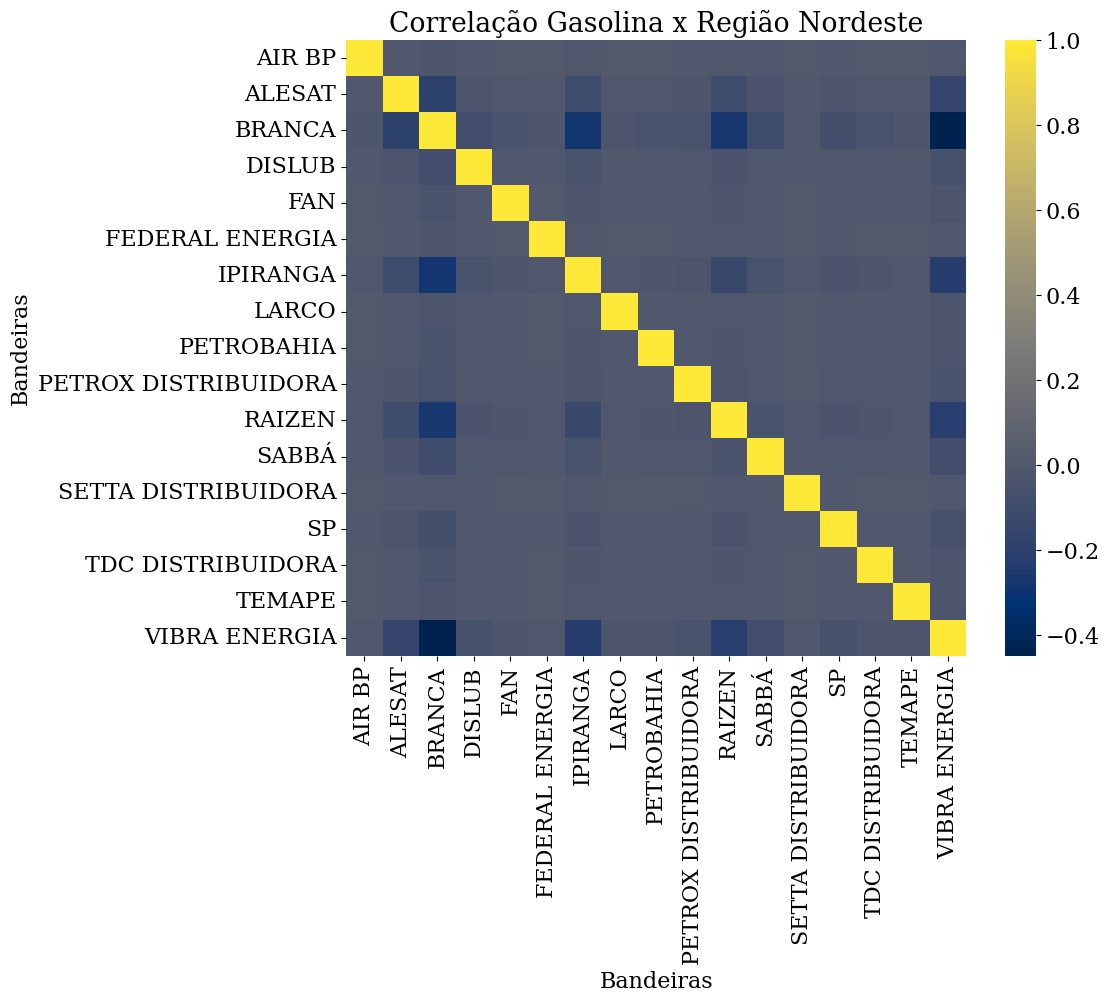

In [189]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cividis')
plt.title('Correlação Gasolina x Região Nordeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [190]:
#REGIÃO CENTRO-OESTE
#GASOLINA: P(preço) e CO(região)
gasolinaPCO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda'].values
gasolinaBandeira = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gasolinaCO, 'Bandeira': gasolinaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,ROYAL FIC,SIMARELLI,TAURUS,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.003653,-0.109534,-0.006841,-0.075681,-0.013482,-0.048591,-0.008176,-0.005779,-0.005777,-0.023826,-0.002583,-0.058931
ATEM' S,-0.003653,1.000000,-0.021972,-0.001372,-0.015181,-0.002704,-0.009747,-0.001640,-0.001159,-0.001159,-0.004779,-0.000518,-0.013100
BRANCA,-0.109534,-0.021972,1.000000,-0.041141,-0.448095,-0.081084,-0.285180,-0.049175,-0.034756,-0.034744,-0.139728,-0.015534,-0.375702
CIAPETRO,-0.006841,-0.001372,-0.041141,1.000000,-0.028426,-0.005064,-0.018251,-0.003071,-0.002171,-0.002170,-0.008949,-0.000970,-0.024530
IPIRANGA,-0.075681,-0.015181,-0.448095,-0.028426,1.000000,-0.056024,-0.188435,-0.020376,-0.024014,-0.024006,-0.093501,-0.010733,-0.264383
MASUT DISTRIBUIDORA,-0.013482,-0.002704,-0.081084,-0.005064,-0.056024,1.000000,-0.035970,-0.006053,-0.004278,-0.004277,0.002118,-0.001912,-0.048345
RAIZEN,-0.048591,-0.009747,-0.285180,-0.018251,-0.188435,-0.035970,1.000000,-0.021815,-0.015418,-0.015413,-0.051628,-0.006891,-0.168791
RIO BRANCO,-0.008176,-0.001640,-0.049175,-0.003071,-0.020376,-0.006053,-0.021815,1.000000,-0.002594,-0.002594,-0.010697,-0.001160,-0.029320
ROYAL FIC,-0.005779,-0.001159,-0.034756,-0.002171,-0.024014,-0.004278,-0.015418,-0.002594,1.000000,-0.001833,-0.007560,-0.000820,0.002236


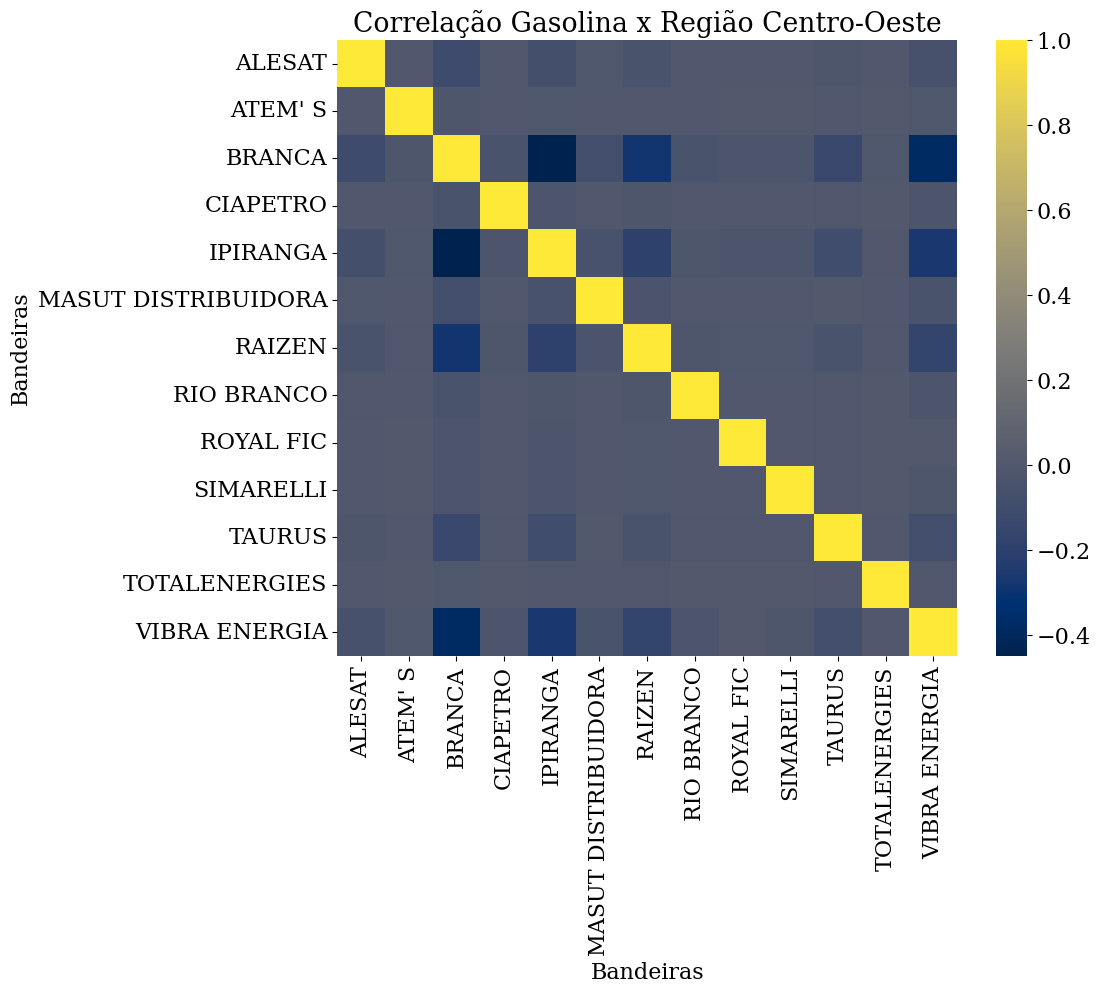

In [191]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cividis')
plt.title('Correlação Gasolina x Região Centro-Oeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [192]:
#REGIÃO SUL
#GASOLINA: P(preço) e S(região)
gasolinaPS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda'].values
gasolinaBandeira = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gasolinaPS, 'Bandeira': gasolinaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,POTENCIAL,RAIZEN,RAIZEN MIME,REJAILE,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.004255,-0.093020,-0.016561,-0.010085,-0.004660,-0.003295,-0.007615,-0.099594,-0.012062,...,-0.014031,-0.057727,-0.025276,-0.005709,-0.020107,-0.018668,-0.005035,-0.005384,-0.068786,-0.002691
AMERICANOIL,-0.004255,1.000000,-0.017275,-0.003076,-0.001873,-0.000865,-0.000612,-0.001414,-0.018496,-0.002240,...,-0.002606,-0.010721,-0.004694,-0.001060,-0.003734,-0.003467,-0.000935,-0.001000,-0.012774,-0.000500
BRANCA,-0.093020,-0.017275,1.000000,-0.067237,-0.040946,-0.018919,-0.013378,-0.030917,-0.404341,-0.048972,...,-0.056963,-0.234366,-0.102617,-0.023179,-0.081631,-0.075791,-0.020440,-0.021856,-0.279262,-0.010923
CHARRUA,-0.016561,-0.003076,-0.067237,1.000000,-0.007290,-0.003368,-0.002382,-0.005504,-0.071989,-0.008719,...,-0.010142,-0.041727,-0.018270,-0.004127,-0.014534,-0.013494,-0.003639,-0.003891,-0.049720,-0.001945
CIAPETRO,-0.010085,-0.001873,-0.040946,-0.007290,1.000000,-0.002051,-0.001450,-0.003352,-0.043840,-0.005310,...,-0.006176,-0.025411,-0.011126,-0.002513,-0.008851,-0.008217,-0.002216,-0.002370,-0.030278,-0.001184
DIBRAPE,-0.004660,-0.000865,-0.018919,-0.003368,-0.002051,1.000000,-0.000670,-0.001549,-0.020256,-0.002453,...,-0.002854,-0.011741,-0.005141,-0.001161,-0.004090,-0.003797,-0.001024,-0.001095,-0.013990,-0.000547
ESTRADA,-0.003295,-0.000612,-0.013378,-0.002382,-0.001450,-0.000670,1.000000,-0.001095,-0.014323,-0.001735,...,-0.002018,-0.008302,-0.003635,-0.000821,-0.002892,-0.002685,-0.000724,-0.000774,-0.009892,-0.000387
IDAZA,-0.007615,-0.001414,-0.030917,-0.005504,-0.003352,-0.001549,-0.001095,1.000000,-0.033102,-0.004009,...,-0.004663,-0.019187,-0.008401,-0.001898,-0.006683,-0.006205,-0.001673,-0.001789,-0.022862,-0.000894
IPIRANGA,-0.099594,-0.018496,-0.404341,-0.071989,-0.043840,-0.020256,-0.014323,-0.033102,1.000000,-0.052433,...,-0.060989,-0.250930,-0.109870,-0.024817,-0.087401,-0.081148,-0.021885,-0.023401,-0.298999,-0.011695


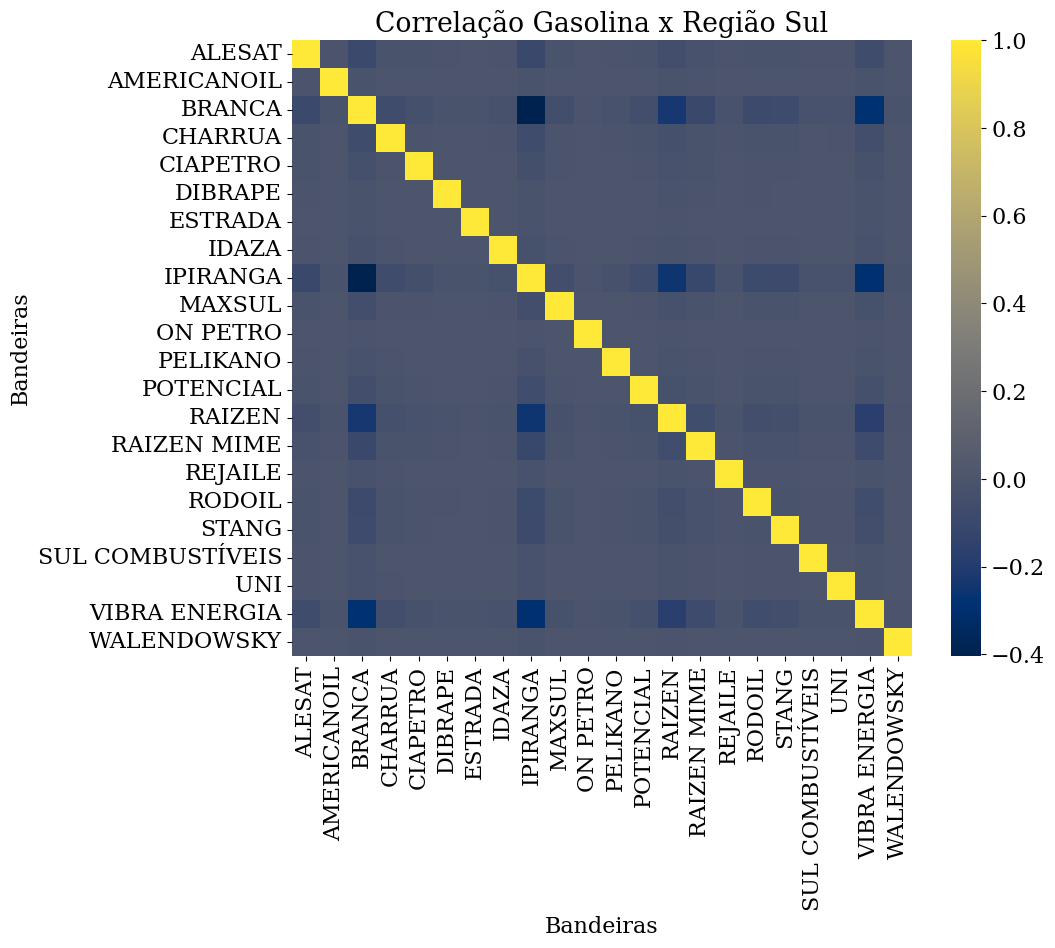

In [193]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cividis')
plt.title('Correlação Gasolina x Região Sul')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [194]:
#REGIÃO SUDESTE
#GASOLINA: P(preço) e SE(região)
gasolinaPSE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA'), 'Valor de Venda'].values
gasolinaBandeira = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gasolinaPSE, 'Bandeira': gasolinaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TAURUS,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.013283,-0.158962,-0.005129,-0.006490,-0.115099,-0.005376,-0.096251,-0.006070,-0.002809,-0.001622,-0.012365,-0.107933
ATLÂNTICA,-0.013283,1.000000,-0.045526,-0.001469,-0.001859,-0.032964,-0.001540,-0.027566,-0.001739,-0.000805,-0.000465,-0.003541,-0.030912
BRANCA,-0.158962,-0.045526,1.000000,-0.017581,-0.022243,-0.394496,-0.018425,-0.329897,-0.020806,-0.009629,-0.005559,-0.042381,-0.369935
CIAPETRO,-0.005129,-0.001469,-0.017581,1.000000,-0.000718,-0.012730,-0.000595,-0.010645,-0.000671,-0.000311,-0.000179,-0.001368,-0.011937
D`MAIS,-0.006490,-0.001859,-0.022243,-0.000718,1.000000,-0.016105,-0.000752,-0.013468,-0.000849,-0.000393,-0.000227,-0.001730,-0.015102
IPIRANGA,-0.115099,-0.032964,-0.394496,-0.012730,-0.016105,1.000000,-0.013341,-0.238867,-0.015065,-0.006972,-0.004025,-0.030687,-0.267857
PETROBRASIL,-0.005376,-0.001540,-0.018425,-0.000595,-0.000752,-0.013341,1.000000,-0.011157,-0.000704,-0.000326,-0.000188,-0.001433,-0.012511
RAIZEN,-0.096251,-0.027566,-0.329897,-0.010645,-0.013468,-0.238867,-0.011157,1.000000,-0.012598,-0.005830,-0.003366,-0.025662,-0.223995
RIO BRANCO,-0.006070,-0.001739,-0.020806,-0.000671,-0.000849,-0.015065,-0.000704,-0.012598,1.000000,-0.000368,-0.000212,-0.001618,-0.014127


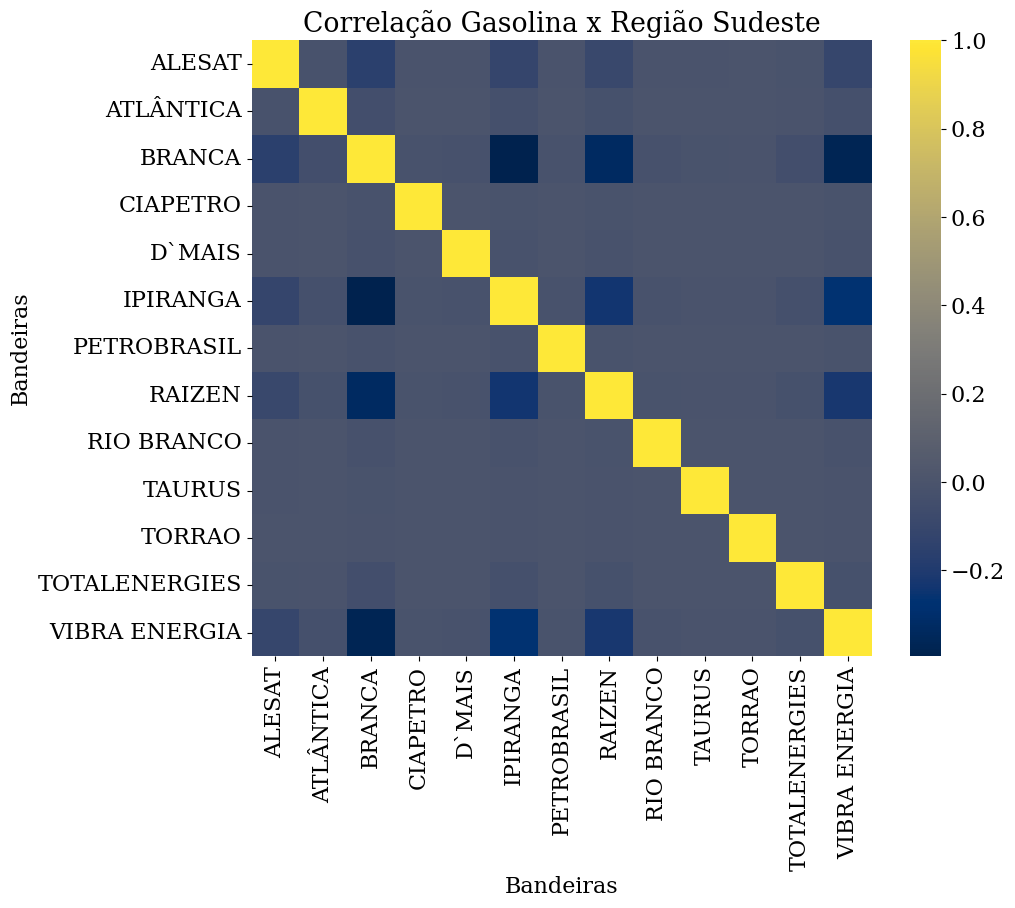

In [195]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='cividis')
plt.title('Correlação Gasolina x Região Sudeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [196]:
#REGIÃO NORTE
#GASOLINA ADITIVADA: P(preço) e N(região)
gaPN = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda'].values
gaBandeira = copia.loc[(copia['Regiao - Sigla']== 'N') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gaPN, 'Bandeira': gaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,EQUADOR,IPIRANGA,RAIZEN,SABBÁ,SIMARELLI,VIBRA ENERGIA
Bandeira,,,,,,,,,
ALESAT,1.000000,-0.028664,-0.055466,-0.016583,-0.072005,-0.017263,-0.040096,-0.007073,-0.074469
ATEM' S,-0.028664,1.000000,-0.120898,-0.036146,-0.156948,-0.037628,-0.087397,-0.015416,-0.162317
BRANCA,-0.055466,-0.120898,1.000000,-0.069944,-0.303704,-0.072812,-0.169118,-0.029831,-0.314095
EQUADOR,-0.016583,-0.036146,-0.069944,1.000000,-0.090800,-0.021769,-0.050562,-0.008919,-0.093907
IPIRANGA,-0.072005,-0.156948,-0.303704,-0.090800,1.000000,-0.094523,-0.219546,-0.038726,-0.407751
RAIZEN,-0.017263,-0.037628,-0.072812,-0.021769,-0.094523,1.000000,-0.052636,-0.009284,-0.097757
SABBÁ,-0.040096,-0.087397,-0.169118,-0.050562,-0.219546,-0.052636,1.000000,-0.021565,-0.227058
SIMARELLI,-0.007073,-0.015416,-0.029831,-0.008919,-0.038726,-0.009284,-0.021565,1.000000,-0.040051
VIBRA ENERGIA,-0.074469,-0.162317,-0.314095,-0.093907,-0.407751,-0.097757,-0.227058,-0.040051,1.000000


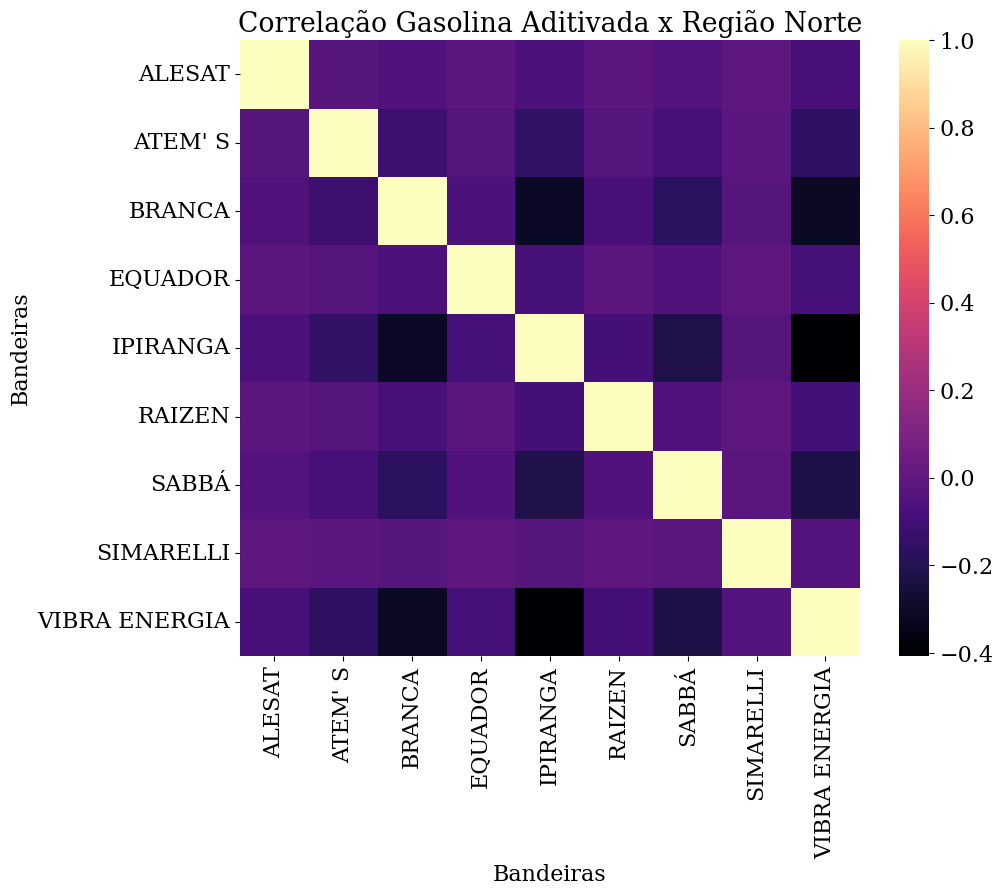

In [201]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.title('Correlação Gasolina Aditivada x Região Norte')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [202]:
#REGIÃO NORDESTE
#GASOLINA ADITIVADA: P(preço) e NE(região)
gaPNE = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda'].values
gaBandeira = copia.loc[(copia['Regiao - Sigla']== 'NE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gaPNE, 'Bandeira': gaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SP,TDC DISTRIBUIDORA,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007336,-0.022071,-0.003255,-0.001622,-0.000867,-0.012232,-0.001681,-0.001438,-0.002129,-0.011286,-0.004506,-0.003403,-0.002037,-0.020315
ALESAT,-0.007336,1.000000,-0.166978,-0.024622,-0.012272,-0.006562,-0.092539,-0.012718,-0.010877,-0.016105,-0.085386,-0.034089,-0.025744,-0.015413,-0.153695
BRANCA,-0.022071,-0.166978,1.000000,-0.074074,-0.036919,-0.019741,-0.278393,-0.038260,-0.032722,-0.048449,-0.256873,-0.102553,-0.077448,-0.046368,-0.462376
DISLUB,-0.003255,-0.024622,-0.074074,1.000000,-0.005444,-0.002911,-0.041051,-0.005642,-0.004825,-0.007144,-0.037878,-0.015122,-0.011420,-0.006837,-0.068181
FAN,-0.001622,-0.012272,-0.036919,-0.005444,1.000000,-0.001451,-0.020460,-0.002812,-0.002405,-0.003561,-0.018879,-0.007537,-0.005692,-0.003408,-0.033982
FEDERAL ENERGIA,-0.000867,-0.006562,-0.019741,-0.002911,-0.001451,1.000000,-0.010941,-0.001504,-0.001286,-0.001904,-0.010095,-0.004030,-0.003044,-0.001822,-0.018171
IPIRANGA,-0.012232,-0.092539,-0.278393,-0.041051,-0.020460,-0.010941,1.000000,-0.021203,-0.018134,-0.026850,-0.142358,-0.056834,-0.042922,-0.025697,-0.256247
LARCO,-0.001681,-0.012718,-0.038260,-0.005642,-0.002812,-0.001504,-0.021203,1.000000,-0.002492,-0.003690,-0.019564,-0.007811,-0.005899,-0.003532,-0.035216
PETROBAHIA,-0.001438,-0.010877,-0.032722,-0.004825,-0.002405,-0.001286,-0.018134,-0.002492,1.000000,-0.003156,-0.016733,-0.006680,-0.005045,-0.003020,-0.030119


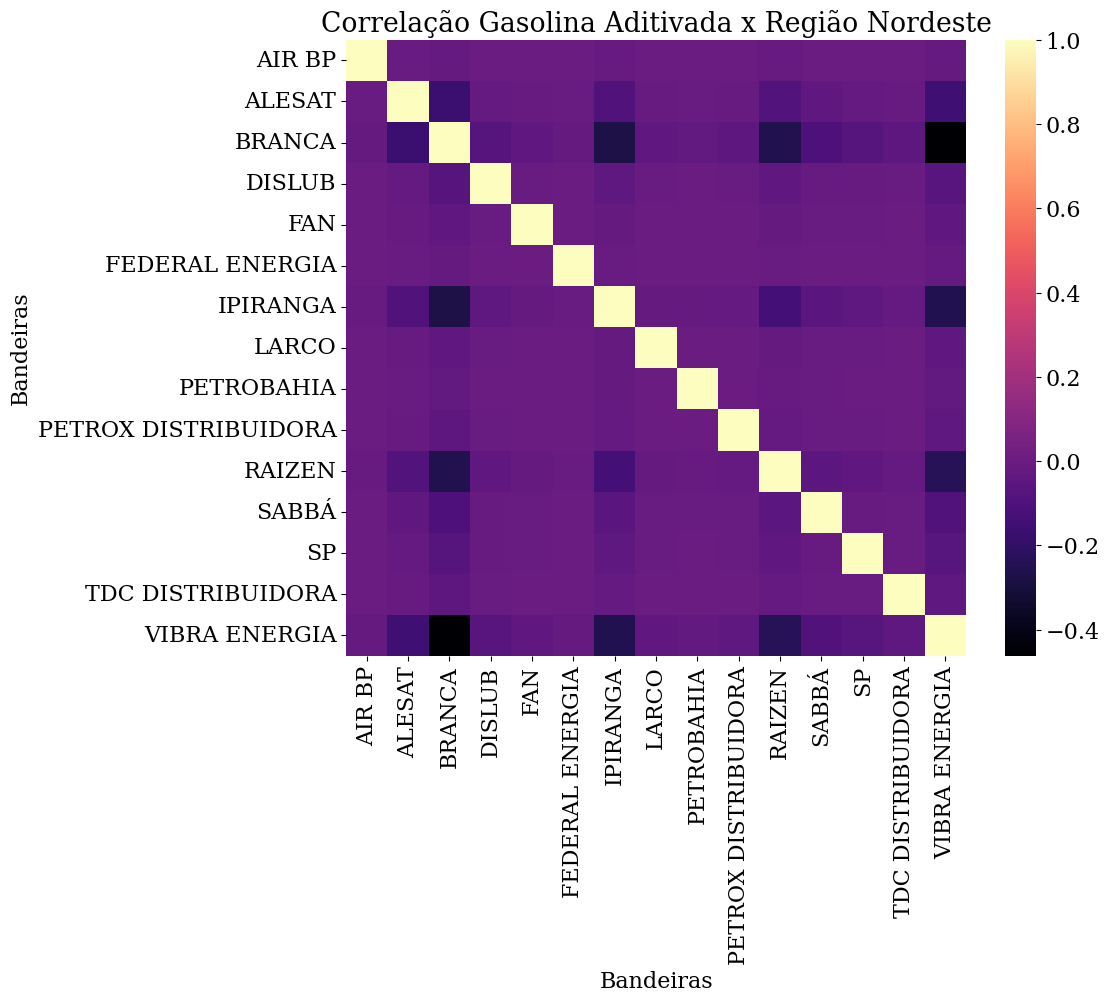

In [203]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.title('Correlação Gasolina Aditivada x Região Nordeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [204]:
#REGIÃO CENTRO-OESTE
#GASOLINA ADITIVADA: P(preço) e CO(região)
gaPCO = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda'].values
gaBandeira = copia.loc[(copia['Regiao - Sigla']== 'CO') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gaPCO, 'Bandeira': gaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,ROYAL FIC,SIMARELLI,TAURUS,VIBRA ENERGIA
Bandeira,,,,,,,,,,,
ALESAT,1.000000,-0.001999,-0.042282,-0.003747,-0.034470,-0.006027,-0.023562,-0.002830,-0.001997,-0.007372,-0.031849
ATEM' S,-0.001999,1.000000,-0.024366,-0.002159,-0.019865,-0.003473,-0.013578,-0.001631,-0.001151,-0.004248,-0.018354
BRANCA,-0.042282,-0.024366,1.000000,-0.045681,-0.420253,-0.073474,-0.287261,-0.034499,-0.024343,-0.089876,-0.388292
CIAPETRO,-0.003747,-0.002159,-0.045681,1.000000,-0.037241,-0.006511,-0.025456,-0.003057,-0.002157,-0.007964,-0.034409
IPIRANGA,-0.034470,-0.019865,-0.420253,-0.037241,1.000000,-0.059900,-0.234189,-0.028125,-0.019846,-0.073272,-0.316554
MASUT DISTRIBUIDORA,-0.006027,-0.003473,-0.073474,-0.006511,-0.059900,1.000000,-0.040944,-0.004917,-0.003470,-0.012810,-0.055344
RAIZEN,-0.023562,-0.013578,-0.287261,-0.025456,-0.234189,-0.040944,1.000000,-0.019225,-0.013565,-0.050084,-0.216378
ROYAL FIC,-0.002830,-0.001631,-0.034499,-0.003057,-0.028125,-0.004917,-0.019225,1.000000,-0.001629,-0.006015,-0.025986
SIMARELLI,-0.001997,-0.001151,-0.024343,-0.002157,-0.019846,-0.003470,-0.013565,-0.001629,1.000000,-0.004244,-0.018336


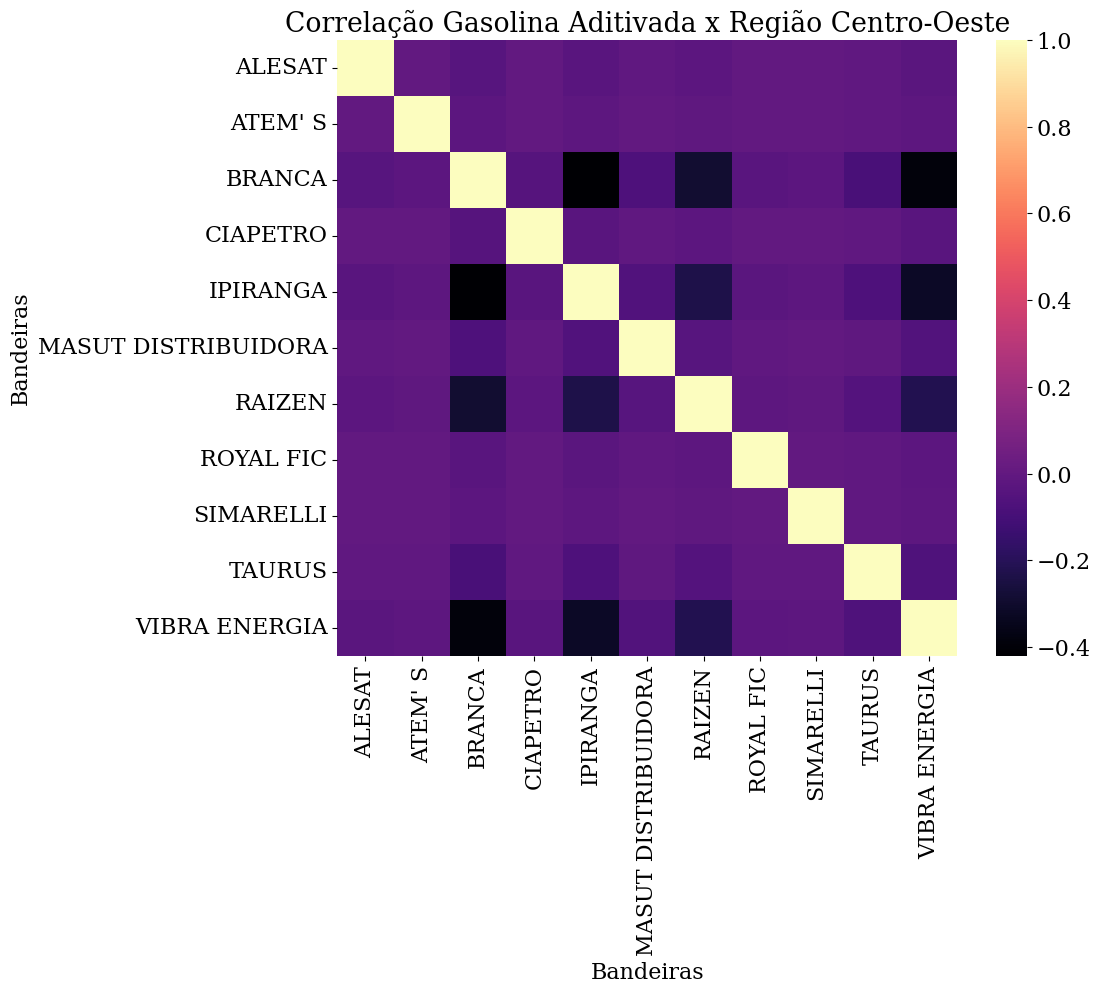

In [205]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.title('Correlação Gasolina Aditivada x Região Centro-Oeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [206]:
#REGIÃO SUL
#GASOLINA ADITIVADA: P(preço) e S(região)
gaPS = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda'].values
gaBandeira = copia.loc[(copia['Regiao - Sigla']== 'S') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gaPS, 'Bandeira': gaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,PELIKANO,POTENCIAL,RAIZEN,RAIZEN MIME,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.001843,-0.082174,-0.015946,-0.008852,-0.004515,-0.003192,-0.010612,-0.096739,-0.012540,...,-0.005833,-0.011539,-0.053888,-0.022374,-0.018187,-0.018097,-0.004516,-0.005216,-0.065193,-0.002607
AMERICANOIL,-0.001843,1.000000,-0.007627,-0.001480,-0.000822,-0.000419,-0.000296,-0.000985,-0.008979,-0.001164,...,-0.000541,-0.001071,-0.005002,-0.002077,-0.001688,-0.001680,-0.000419,-0.000484,-0.006051,-0.000242
BRANCA,-0.082174,-0.007627,1.000000,-0.065989,-0.036631,-0.018684,-0.013211,-0.043914,-0.400330,-0.051893,...,-0.024137,-0.047750,-0.223000,-0.092590,-0.075262,-0.074890,-0.018689,-0.021584,-0.269783,-0.010787
CHARRUA,-0.015946,-0.001480,-0.065989,1.000000,-0.007108,-0.003626,-0.002564,-0.008522,-0.077686,-0.010070,...,-0.004684,-0.009266,-0.043274,-0.017967,-0.014605,-0.014533,-0.003627,-0.004189,-0.052352,-0.002093
CIAPETRO,-0.008852,-0.000822,-0.036631,-0.007108,1.000000,-0.002013,-0.001423,-0.004730,-0.043124,-0.005590,...,-0.002600,-0.005144,-0.024022,-0.009974,-0.008107,-0.008067,-0.002013,-0.002325,-0.029061,-0.001162
DIBRAPE,-0.004515,-0.000419,-0.018684,-0.003626,-0.002013,1.000000,-0.000726,-0.002413,-0.021996,-0.002851,...,-0.001326,-0.002624,-0.012253,-0.005087,-0.004135,-0.004115,-0.001027,-0.001186,-0.014823,-0.000593
ESTRADA,-0.003192,-0.000296,-0.013211,-0.002564,-0.001423,-0.000726,1.000000,-0.001706,-0.015552,-0.002016,...,-0.000938,-0.001855,-0.008663,-0.003597,-0.002924,-0.002909,-0.000726,-0.000839,-0.010481,-0.000419
IDAZA,-0.010612,-0.000985,-0.043914,-0.008522,-0.004730,-0.002413,-0.001706,1.000000,-0.051697,-0.006701,...,-0.003117,-0.006166,-0.028798,-0.011957,-0.009719,-0.009671,-0.002413,-0.002787,-0.034839,-0.001393
IPIRANGA,-0.096739,-0.008979,-0.400330,-0.077686,-0.043124,-0.021996,-0.015552,-0.051697,1.000000,-0.061091,...,-0.028415,-0.056214,-0.262527,-0.109001,-0.088602,-0.088165,-0.022002,-0.025410,-0.317601,-0.012699


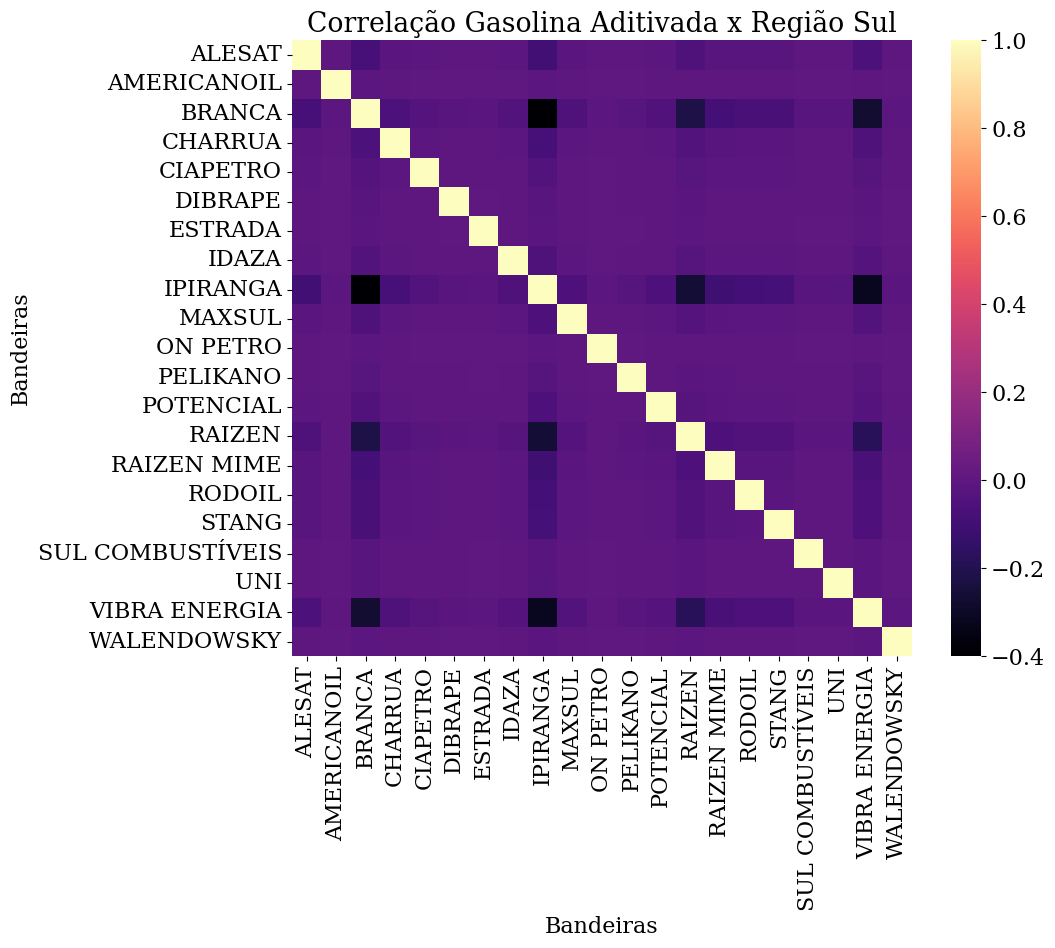

In [207]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.title('Correlação Gasolina Aditivada x Região Sul')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

In [210]:
#REGIÃO SUDESTE
#GASOLINA ADITIVADA: P(preço) e SE(região)
gaPSE = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Valor de Venda'].values
gaBandeira = copia.loc[(copia['Regiao - Sigla']== 'SE') & (copia['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolinaReg = pd.DataFrame({'Venda':gaPSE, 'Bandeira': gaBandeira})
gasolinaRegPivot = gasolinaReg.pivot_table(index=gasolinaReg.index, columns = 'Bandeira', values = 'Venda')
gasolinaRegPivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,
ALESAT,1.000000,-0.011810,-0.117610,-0.001607,-0.006429,-0.109079,-0.003213,-0.092124,-0.006013,-0.001607,-0.010300,-0.098091
ATLÂNTICA,-0.011810,1.000000,-0.039972,-0.000546,-0.002185,-0.037073,-0.001092,-0.031310,-0.002044,-0.000546,-0.003501,-0.033339
BRANCA,-0.117610,-0.039972,1.000000,-0.005438,-0.021760,-0.369193,-0.010876,-0.311806,-0.020353,-0.005438,-0.034860,-0.332005
CIAPETRO,-0.001607,-0.000546,-0.005438,1.000000,-0.000297,-0.005043,-0.000149,-0.004259,-0.000278,-0.000074,-0.000476,-0.004535
D`MAIS,-0.006429,-0.002185,-0.021760,-0.000297,1.000000,-0.020181,-0.000595,-0.017044,-0.001113,-0.000297,-0.001906,-0.018149
IPIRANGA,-0.109079,-0.037073,-0.369193,-0.005043,-0.020181,1.000000,-0.010087,-0.289189,-0.018876,-0.005043,-0.032332,-0.307922
PETROBRASIL,-0.003213,-0.001092,-0.010876,-0.000149,-0.000595,-0.010087,1.000000,-0.008519,-0.000556,-0.000149,-0.000952,-0.009071
RAIZEN,-0.092124,-0.031310,-0.311806,-0.004259,-0.017044,-0.289189,-0.008519,1.000000,-0.015942,-0.004259,-0.027306,-0.260059
RIO BRANCO,-0.006013,-0.002044,-0.020353,-0.000278,-0.001113,-0.018876,-0.000556,-0.015942,1.000000,-0.000278,-0.001782,-0.016975


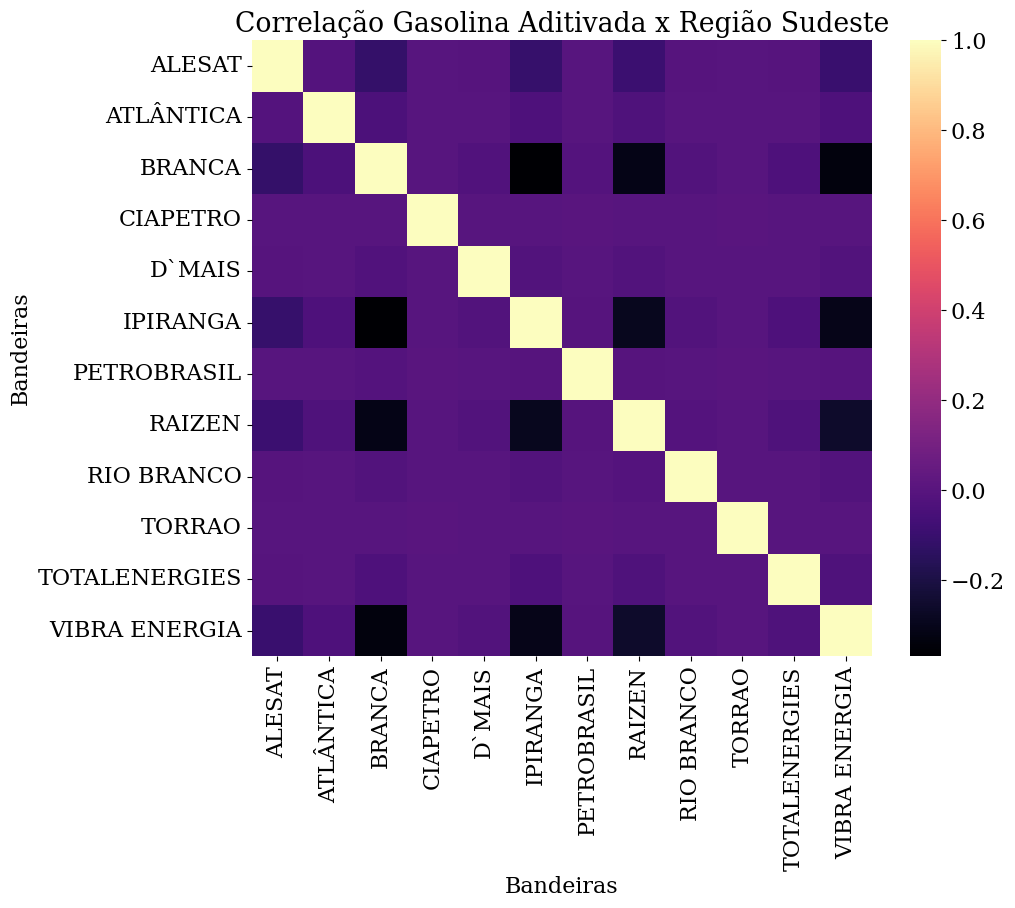

In [211]:
#criando o gráfico de calor a partir da matriz de correlação anterior
correlation_matrix = gasolinaRegPivot.fillna(0).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma')
plt.title('Correlação Gasolina Aditivada x Região Sudeste')
plt.xlabel('Bandeiras')
plt.ylabel('Bandeiras')
plt.show()

## 2. *Insights* Estratégicos


### [ 11 ] Distribuição de postos de revenda por região


In [235]:
#armazenando por variável de região a quantidade de postos de revenda via .loc()
#a função .nunique() complementa para contar o número de valores únicos na coluna 'Revenda' com base na região filtrada
postosN = copia.loc[copia['Regiao - Sigla'] == 'N', 'Revenda'].nunique()
postosNE = copia.loc[copia['Regiao - Sigla'] == 'NE', 'Revenda'].nunique()
postosCO = copia.loc[copia['Regiao - Sigla'] == 'CO', 'Revenda'].nunique()
postosSE = copia.loc[copia['Regiao - Sigla'] == 'SE', 'Revenda'].nunique()
postosS = copia.loc[copia['Regiao - Sigla'] == 'S', 'Revenda'].nunique()
#variável que armazena o total de postos de revenda únicos
totalpostos = copia['Revenda'].nunique()
#calculando a percentagem de postos por região
porcentagemN = (postosN / totalpostos) * 100
porcentagemNE = (postosNE / totalpostos) * 100
porcentagemCO = (postosCO / totalpostos) * 100
porcentagemSE = (postosSE / totalpostos) * 100
porcentagemS = (postosS / totalpostos) * 100

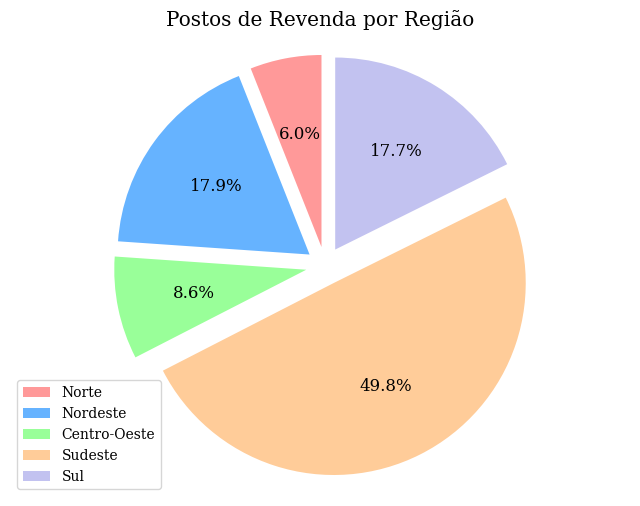

In [245]:
#construção do gráfico em pizza
plt.rcParams['font.size'] = 12
labels = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
sizes = [porcentagemN, porcentagemNE, porcentagemCO, porcentagemSE, porcentagemS]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
destaque = (0.1, 0.1, 0.1, 0.1, 0.1)  #destacando a primeira fatia (Região Norte)
#plotagem dos dados
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=destaque, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Postos de Revenda por Região')
plt.axis('equal')  #tornando o gráfico de pizza circular
plt.legend(labels, loc='best', fontsize=10)
plt.show()

### [ 12 ] Comportamento da quantidade de coleta de combustíveis em cidades/estados/regiões, considerando os postos de revenda

In [280]:
#variável armazenando a quantidade de coletas dos postos por região. O método count() retorna o número de valores
#não-nulos em cada grupo após aplicar a função .groupby()
coletasRegiao = copia.groupby('Regiao - Sigla')['Data da Coleta'].count()
display(coletasRegiao)

Regiao - Sigla
CO     7200
N      5639
NE    17943
S     16271
SE    48223
Name: Data da Coleta, dtype: int64

In [281]:
#variável armazenando a quantidade de coletas dos postos por estado. O método count() retorna o número de valores
#não-nulos em cada grupo após aplicar a função .groupby()
coletasEstado = copia.groupby('Estado - Sigla')['Data da Coleta'].count()
display(coletasEstado)

Estado - Sigla
AC      318
AL     1145
AM     1039
AP      185
BA     4407
CE     3299
DF     1225
ES     2015
GO     3570
MA     1642
MG    10263
MS     1172
MT     1233
PA     1789
PB     1259
PE     3179
PI     1175
PR     6525
RJ     7884
RN     1132
RO     1060
RR      292
RS     5828
SC     3918
SE      705
SP    28061
TO      956
Name: Data da Coleta, dtype: int64

In [283]:
#variável armazenando a quantidade de coletas dos postos por município. O método count() retorna o número de valores
#não-nulos em cada grupo após aplicar a função .groupby()
coletasMunicipio = copia.groupby('Municipio')['Data da Coleta'].count()
display(coletasMunicipio)

Municipio
ABAETETUBA                61
ACAILANDIA               177
ADAMANTINA               152
AGUAS LINDAS DE GOIAS    154
ALAGOINHAS               191
                        ... 
VOLTA REDONDA            232
VOTORANTIM                61
VOTUPORANGA              181
XANXERE                  145
XINGUARA                  77
Name: Data da Coleta, Length: 441, dtype: int64

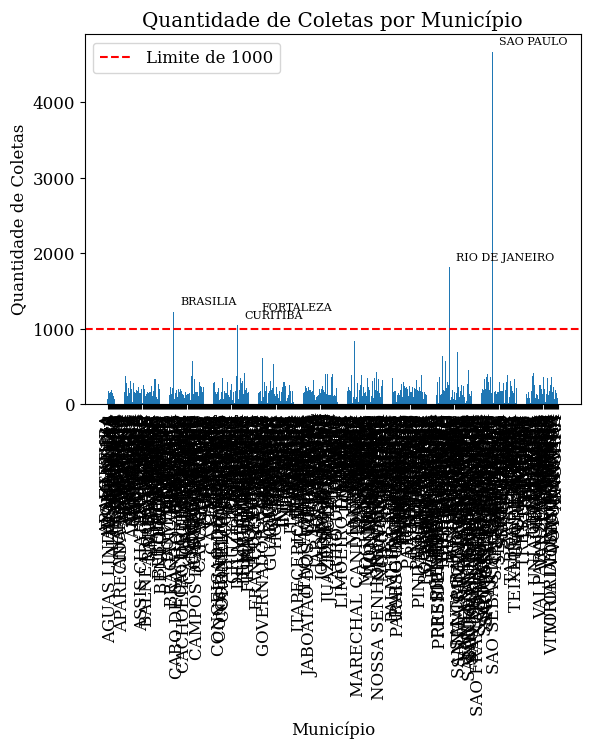

In [284]:
#construindo o gráfico de barras para a quantidade de coletas por município
plt.bar(coletasMunicipio.index, coletasMunicipio)
plt.xlabel('Município')
plt.ylabel('Quantidade de Coletas')
plt.title('Quantidade de Coletas por Município')
plt.xticks(rotation=90)
#adicionando uma linha horizontal em y=1000 para destaque de alguns dados
plt.axhline(y=1000, color='red', linestyle='--', label='Limite de 1000')
#marcando os pontos que passaram de 1000 coletas registradas
for i, valor in enumerate(coletasMunicipio):
    if valor > 1000:
        municipio = coletasMunicipio.index[i]
        plt.annotate(f'{municipio}', xy=(i, valor), xytext=(5, 5), textcoords='offset points', fontsize='8')
#plotando a legenda e visualização final
plt.legend()
plt.show()

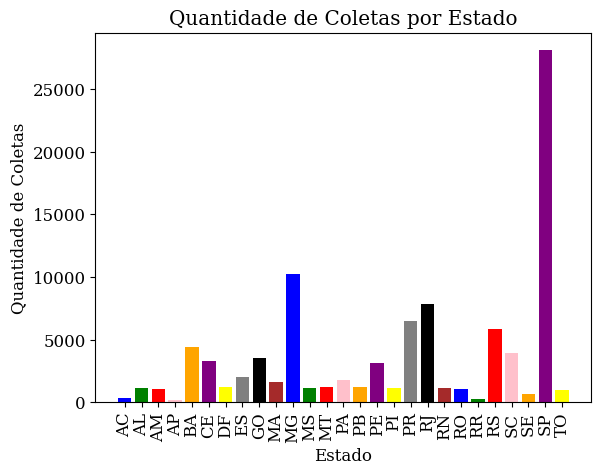

In [285]:
#construindo o gráfico de barras para a quantidade de coletas por município
#armazenando cores personalizadas para cada barra
cores = ['blue', 'green', 'red', 'pink', 'orange', 'purple', 'yellow', 'grey', 'black','brown']
#plotando o gráfico
plt.bar(coletasEstado.index, coletasEstado, color=cores)
plt.xlabel('Estado')
plt.ylabel('Quantidade de Coletas')
plt.title('Quantidade de Coletas por Estado')
plt.xticks(rotation=90)
plt.show()

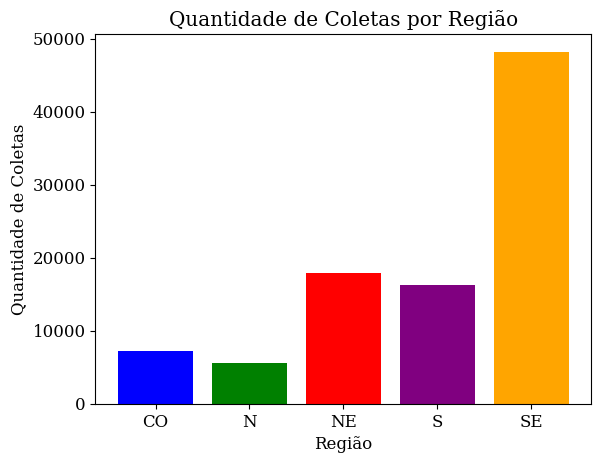

In [288]:
#construindo o gráfico de barras para a quantidade de coletas por região
#armazenando cores personalizadas para cada barra
cores = ['blue', 'green', 'red', 'purple', 'orange']
#plotando o gráfico
plt.bar(coletasRegiao.index, coletasRegiao, color=cores)
plt.xlabel('Região')
plt.ylabel('Quantidade de Coletas')
plt.title('Quantidade de Coletas por Região')
plt.show()

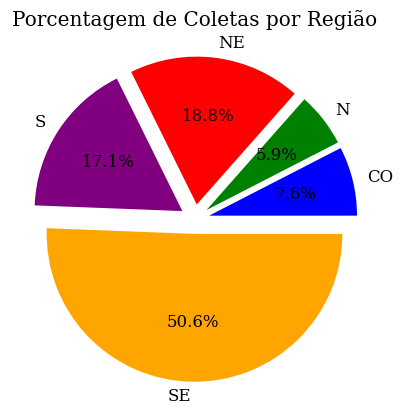

In [292]:
#construindo o gráfico em pizza para a quantidade de coletas por região em pecentagem
#porcentagem de coletas por região
porcentReg = coletasRegiao / coletasRegiao.sum() * 100
#armazenando cores personalizadas para cada fatia da pizza
cores = ['blue', 'green', 'red', 'purple', 'orange']
#plotando o gráfico de pizza
destaque = [0.1, 0.1, 0.1, 0.1, 0.1] 
plt.pie(porcentReg, labels=coletasRegiao.index, colors=cores, autopct='%1.1f%%', explode=destaque)
plt.title('Porcentagem de Coletas por Região')
plt.show()

#Considerações Finais
---

Partindo dessas informações, é possível fazer uma devolutiva eficaz para a ANP, abordando dados mais profundos do tipo:

*   influência da prática de preços de uma bandeira por outra, dependendo da região que foi analisada;
*   maior ou menor investimento na distribuição de derivados de petróleo em regiões estratégicas;
*   maior ou menor presença de fiscalização pelas amostras de coletagem em postos de revenda;
*   potenciais áreas de investimento em inovação de energia pela demanda de combustíveis tradicionais.





---
---